In [ ]:
from google.colab import files
files.upload()

파일 불러오기
--

In [2]:
import io
import pandas as pd

train=pd.read_csv('train.csv', encoding='cp949', parse_dates=['date_time'])
test=pd.read_csv('test.csv', encoding='cp949', parse_dates=['date_time'])
sample_submission=pd.read_csv('sample_submission.csv', encoding='cp949', parse_dates=['num_date_time'] )

In [3]:
df_train=pd.DataFrame(train)
df_test=pd.DataFrame(test) 
df_sample_submission=pd.DataFrame(sample_submission)

In [4]:
df_train['time'] = df_train['date_time'].dt.strftime('%m%d%H')
df_train['month_day'] = df_train['date_time'].dt.strftime('%m%d')
df_train['month']=df_train['date_time'].dt.strftime('%m')
df_train['date']=df_train['date_time'].dt.strftime('%d')
df_train['hour']=df_train['date_time'].dt.strftime('%H')
df_train['day']=df_train['date_time'].dt.strftime('%A')

df_test['time'] = df_test['date_time'].dt.strftime('%m%d%H')
df_test['month_day'] = df_test['date_time'].dt.strftime('%m%d')
df_test['month']=df_test['date_time'].dt.strftime('%m')
df_test['date']=df_test['date_time'].dt.strftime('%d')
df_test['hour']=df_test['date_time'].dt.strftime('%H')
df_test['day']=df_test['date_time'].dt.strftime('%A')

In [5]:
tn_month_day=pd.Series(df_train['month_day'], dtype=int)
tn_month=pd.Series(df_train['month'], dtype=int)
tn_date=pd.Series(df_train['date'], dtype=int)
tn_hour=pd.Series(df_train['hour'], dtype=int)
tn_time=pd.Series(df_train['time'], dtype=int)

te_month_day=pd.Series(df_test['month_day'], dtype=int)
te_month=pd.Series(df_test['month'], dtype=int)
te_date=pd.Series(df_test['date'], dtype=int)
te_hour=pd.Series(df_test['hour'], dtype=int)
te_time=pd.Series(df_test['time'], dtype=int)

df_train['month_day'] =tn_month_day
df_train['month']=tn_month
df_train['date']=tn_date
df_train['hour']=tn_hour
df_train['time']=tn_time

df_test['month_day']=te_month_day
df_test['month']=te_month
df_test['date']=te_date
df_test['hour']=te_hour
df_test['time']=te_time

In [6]:
from pandas.api.types import CategoricalDtype

cats=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

cat_type=CategoricalDtype(categories=cats, ordered=True)

df_train['day']=df_train['day'].astype(cat_type)
df_test['day']=df_test['day'].astype(cat_type)

Train 데이터에 마지막 7일을 test 데이터로 지정하여 결과 비교해보기

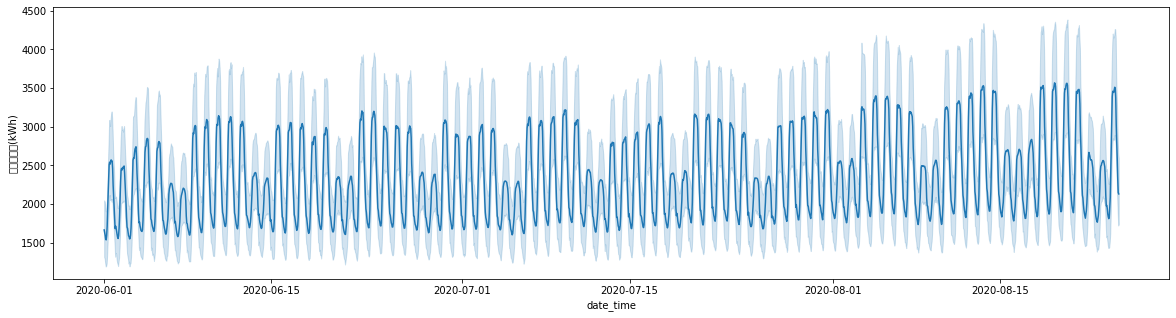

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,5))
sns.lineplot(x=df_train['date_time'], y=df_train['전력사용량(kWh)'], data=df_train)

EDA
--

In [8]:
df_test.isna().sum()

num                0
date_time          0
기온(°C)          6720
풍속(m/s)         6720
습도(%)           6720
강수량(mm, 6시간)    8400
일조(hr, 3시간)     6720
비전기냉방설비운영       7784
태양광보유           8456
time               0
month_day          0
month              0
date               0
hour               0
day                0
dtype: int64

In [9]:
df_test['기온(°C)']=df_test['기온(°C)'].fillna(0)
df_test['풍속(m/s)']=df_test['풍속(m/s)'].fillna(0)
df_test['습도(%)']=df_test['습도(%)'].fillna(0)
df_test['강수량(mm, 6시간)']=df_test['강수량(mm, 6시간)'].fillna(0)
df_test['일조(hr, 3시간)']=df_test['일조(hr, 3시간)'].fillna(0)
df_test['비전기냉방설비운영']=df_test['비전기냉방설비운영'].fillna(0)
df_test['태양광보유']=df_test['태양광보유'].fillna(0)

In [10]:
df_test.isna().sum()

num             0
date_time       0
기온(°C)          0
풍속(m/s)         0
습도(%)           0
강수량(mm, 6시간)    0
일조(hr, 3시간)     0
비전기냉방설비운영       0
태양광보유           0
time            0
month_day       0
month           0
date            0
hour            0
day             0
dtype: int64

In [11]:
df_train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month',
       'date', 'hour', 'day'],
      dtype='object')

In [12]:
df_test.columns

Index(['num', 'date_time', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm, 6시간)',
       '일조(hr, 3시간)', '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month',
       'date', 'hour', 'day'],
      dtype='object')

In [13]:
df_test['강수량(mm)']=df_test['강수량(mm, 6시간)']
df_test['일조(hr)']=df_test['일조(hr, 3시간)']

df_test.drop(['강수량(mm, 6시간)'], axis=1, inplace=True)
df_test.drop(['일조(hr, 3시간)'], axis=1, inplace=True)

In [14]:
df_test=df_test[['num', 'date_time', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)',
       '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month',
       'date', 'hour', 'day']]

In [15]:
df_train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month',
       'date', 'hour', 'day'],
      dtype='object')

In [16]:
df_test.columns

Index(['num', 'date_time', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)',
       '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month', 'date', 'hour',
       'day'],
      dtype='object')

In [17]:
df_test.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,month_day,month,date,hour,day
0,1,2020-08-25 00:00:00,27.8,1.5,74.0,0.0,0.0,0.0,0.0,82500,825,8,25,0,Tuesday
1,1,2020-08-25 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82501,825,8,25,1,Tuesday
2,1,2020-08-25 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82502,825,8,25,2,Tuesday
3,1,2020-08-25 03:00:00,27.3,1.1,78.0,0.0,0.0,0.0,0.0,82503,825,8,25,3,Tuesday
4,1,2020-08-25 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82504,825,8,25,4,Tuesday


칼럼 만들어주기
--

강풍특보

train

In [18]:
df_train['강풍특보']=df_train['풍속(m/s)']
df_test['강풍특보']=df_test['풍속(m/s)']

In [19]:

i=0

for i in range(0,122400):
    wind=df_train.loc[i, '풍속(m/s)']
    if wind >=21:
        df_train['강풍특보'][i]=3
    elif 21>wind >=14:
        df_train['강풍특보'][i]=2
    else:
        df_train['강풍특보'][i]=1
    
    i+=1

In [20]:
df_train['강풍특보'].unique()

array([1., 2.])

In [21]:
Typhoon_warning=df_train.loc[df_train['강풍특보']==2]

print('강풍주의보가 발령된 횟수는', len(df_train.loc[df_train['강풍특보']==2]), '번 입니다')
print('강풍 주의보가 발령된 건물번호는', Typhoon_warning.num.unique(), '입니다.')
print('강풍 주의보가 발령된 시간은', Typhoon_warning.time.unique(), '입니다.')

강풍주의보가 발령된 횟수는 31 번 입니다
강풍 주의보가 발령된 건물번호는 [30] 입니다.
강풍 주의보가 발령된 시간은 [62920 62922 62923 63000 63001 63002 63003 63004 72319 72321 72322 72323
 72400 72401 72402 72403 72406 72407 72408 72409 72410 72411 72412 72413
 72414 72415 72416 72417 72418 72419 72502] 입니다.


test

In [22]:
i=0

for i in range(0,10080):
    wind=df_test.loc[i, '풍속(m/s)']
    if wind >=21:
        df_test['강풍특보'][i]=3
    elif 21>wind >=14:
        df_test['강풍특보'][i]=2
    else:
        df_test['강풍특보'][i]=1
    
    i+=1

In [23]:
df_test['강풍특보'].unique()

array([1., 2., 3.])

In [24]:
Typhoon_warning=df_test.loc[df_test['강풍특보']==2]

print('강풍주의보가 발령된 횟수는', len(df_test.loc[df_test['강풍특보']==2]), '번 입니다')
print('강풍 주의보가 발령된 건물번호는', Typhoon_warning.num.unique(), '입니다.')
print('강풍 주의보가 발령된 시간은', Typhoon_warning.time.unique(), '입니다.')

강풍주의보가 발령된 횟수는 4 번 입니다
강풍 주의보가 발령된 건물번호는 [30] 입니다.
강풍 주의보가 발령된 시간은 [82609 82612 82618 82621] 입니다.


In [25]:
Typhoon_warning=df_test.loc[df_test['강풍특보']==3]

print('강풍 경보가 발령된 횟수는', len(df_test.loc[df_test['강풍특보']==3]), '번 입니다')
print('강풍 경보가 발령된 건물번호는', Typhoon_warning.num.unique(), '입니다.')
print('강풍 경보가 발령된 시간은', Typhoon_warning.time.unique(), '입니다.')

강풍 경보가 발령된 횟수는 1 번 입니다
강풍 경보가 발령된 건물번호는 [30] 입니다.
강풍 경보가 발령된 시간은 [82615] 입니다.


호우 특보

train

In [26]:
df_train['호우특보']=df_train['강수량(mm)']
df_test['호우특보']=df_test['강수량(mm)']

In [27]:
i=0

for i in range(0,122398):
    a=df_train.loc[i, '강수량(mm)']
    b=df_train.loc[i+1, '강수량(mm)']
    c=df_train.loc[i+2, '강수량(mm)']

    d=a+b+c
    
    if d<60:
        df_train['호우특보'][i]=1
    elif 60<= d <90:
        df_train['호우특보'][i]=2
    else:
        df_train['호우특보'][i]=3
        
    i+=1

In [28]:
df_train['호우특보'].unique()

array([1., 2., 3., 0.])

In [29]:
print('호우주의보가 발령된 횟수는', len(df_train.loc[df_train['호우특보']==2]), '번 입니다')

호우주의보가 발령된 횟수는 187 번 입니다


In [30]:
Heavy_rain_advisory =df_train.loc[df_train['호우특보']==2]

print('호우주의보가 발령된 횟수는', len(df_train.loc[df_train['호우특보']==2]), '번 입니다')
print('호우 주의보가 발령된 건물번호는', Heavy_rain_advisory.num.unique(), '입니다.')
print('호우 주의보가 발령된 시간은', Heavy_rain_advisory.time.unique(), '입니다.')

호우주의보가 발령된 횟수는 187 번 입니다
호우 주의보가 발령된 건물번호는 [ 2  3  5  6  9 10 11 12 13 15 16 18 19 22 23 24 25 26 28 29 30 32 33 35
 36 37 39 40 41 42 44 45 48 50 53 54 56 57 60] 입니다.
호우 주의보가 발령된 시간은 [61302 71007 71012 72208 72209 80718 80806 80807 72207 80604 80606 80907
 80908 72202 81105 61300 61301 72319 72321 73003 73004 73005 80800 80801
 80802 63000 72322 61307 61308 71003 82221 73007 80808 80809 71005 72909
 72910 80712 80713 80716 80723 80810 72923 73000 80311] 입니다.


In [31]:
Heavy_rain_advisory =df_train.loc[df_train['호우특보']==3]

print('호우 경보가 발령된 횟수는', len(df_train.loc[df_train['호우특보']==3]), '번 입니다')
print('호우 경보가 발령된 건물번호는', Heavy_rain_advisory.num.unique(), '입니다.')
print('호우 경보가 발령된 시간은', Heavy_rain_advisory.time.unique(), '입니다.')

호우 경보가 발령된 횟수는 88 번 입니다
호우 경보가 발령된 건물번호는 [ 2  3  5  6 10 11 15 18 19 24 25 28 32 39 41 44 45 50 54 56 57] 입니다.
호우 경보가 발령된 시간은 [71008 71009 71010 71011 72320 72321 72322 80719 80720 80605 73008 73009
 80714 80715 80805 80806 80807 80312 80313 80314] 입니다.


test

In [32]:
i=0

for i in range(0,10080):
    a=df_test.loc[i, '강수량(mm)']
    
    if a<76:
        df_test['호우특보'][i]=1
    elif 76<= a <120:
        df_test['호우특보'][i]=2
    else:
        df_test['호우특보'][i]=3
        
    i+=1

In [33]:
df_test['호우특보'].unique()

array([1., 2.])

In [34]:
print('호우주의보가 발령된 횟수는', len(df_test.loc[df_test['호우특보']==2]), '번 입니다')

호우주의보가 발령된 횟수는 1 번 입니다


In [35]:
Heavy_rain_advisory =df_test.loc[df_test['호우특보']==2]

print('호우주의보가 발령된 횟수는', len(df_test.loc[df_test['호우특보']==2]), '번 입니다')
print('호우 주의보가 발령된 건물번호는', Heavy_rain_advisory.num.unique(), '입니다.')
print('호우 주의보가 발령된 시간은', Heavy_rain_advisory.time.unique(), '입니다.')

호우주의보가 발령된 횟수는 1 번 입니다
호우 주의보가 발령된 건물번호는 [13] 입니다.
호우 주의보가 발령된 시간은 [82700] 입니다.


체감온도 구하기
--

In [36]:
df_train['체감온도']=df_train['기온(°C)']
df_test['체감온도']=df_test['기온(°C)']

In [37]:
i=0
for i in range(0,122400):
    T=df_train.loc[i]['기온(°C)']
    H=df_train.loc[i]['습도(%)']
    Perceived_temperature=T+((H - 50) * 0.1)
    df_train.loc[i]['체감온도']= Perceived_temperature
    i+=1

In [38]:
df_train['체감온도']

0         17.6
1         17.7
2         17.5
3         17.1
4         17.0
          ... 
122395    27.8
122396    27.3
122397    27.3
122398    27.1
122399    27.1
Name: 체감온도, Length: 122400, dtype: float64

In [39]:
i=0
for i in range(0,10080):
    T=df_test.loc[i]['기온(°C)']
    H=df_test.loc[i]['습도(%)']
    Perceived_temperature=T+((H - 50) * 0.1)
    df_test.loc[i]['체감온도']= Perceived_temperature
    i+=1

In [40]:
df_test['체감온도']

0        27.8
1         0.0
2         0.0
3        27.3
4         0.0
         ... 
10075     0.0
10076     0.0
10077    27.9
10078     0.0
10079     0.0
Name: 체감온도, Length: 10080, dtype: float64

폭염 특보
--

train

In [41]:
powerfever=df_train.groupby(['month_day'])['체감온도'].max().reset_index()
powerfever

,month_day,체감온도
0,601,30.2
1,602,29.4
2,603,30.5
3,604,35.0
4,605,33.7
...,...,...
80,820,36.0
81,821,33.9
82,822,32.8
83,823,32.3


In [42]:
superpowerfever=powerfever.loc[powerfever['체감온도']>=33]

In [43]:
superpowerfever

,month_day,체감온도
3,604,35.0
4,605,33.7
7,608,34.6
8,609,36.3
9,610,35.3
12,613,33.1
21,622,35.2
22,623,33.6
48,719,34.3
61,801,33.3


In [44]:
supersuperpowerfever=powerfever.loc[powerfever['체감온도']>=35]

In [45]:
supersuperpowerfever

,month_day,체감온도
3,604,35.0
8,609,36.3
9,610,35.3
21,622,35.2
73,813,35.5
74,814,35.6
75,815,35.7
76,816,35.8
78,818,35.7
79,819,35.5


- 이틀이상 35도를 넘은 날은, (6월 9일,6월 10일), (8월 13일,8월 20일)

- 폭염 주의보 발령: 6월 5일, 6월 9일, 6월 23일, 8월 2일, 8월 5일, 8월 12일, 8월 13일, 8월 21일

- 폭염 경보 발령: 6월 10일, 8월 14일부터 8월 20일

In [46]:
df_train['폭염특보']=0

In [47]:
i=0

for i in range(0,122400):
    if df_train.loc[i]['month_day']==605:
        df_train['폭염특보'][i]=2
    elif df_train.loc[i]['month_day']==609:
        df_train['폭염특보'][i]=2
    elif df_train.loc[i]['month_day']==623:
        df_train['폭염특보'][i]=2
    elif df_train.loc[i]['month_day']==802:
        df_train['폭염특보'][i]=2
    elif df_train.loc[i]['month_day']==805:
        df_train['폭염특보'][i]=2
    elif df_train.loc[i]['month_day']==812:
        df_train['폭염특보'][i]=2
    elif df_train.loc[i]['month_day']==813:
        df_train['폭염특보'][i]=2
    elif df_train.loc[i]['month_day']==610:
        df_train['폭염특보'][i]=3
    elif df_train.loc[i]['month_day']==814:
        df_train['폭염특보'][i]=3
    elif df_train.loc[i]['month_day']==815:
        df_train['폭염특보'][i]=3 
    elif df_train.loc[i]['month_day']==816:
        df_train['폭염특보'][i]=3
    elif df_train.loc[i]['month_day']==817:
        df_train['폭염특보'][i]=3  
    elif df_train.loc[i]['month_day']==818:
        df_train['폭염특보'][i]=3  
    elif df_train.loc[i]['month_day']==819:
        df_train['폭염특보'][i]=3  
    elif df_train.loc[i]['month_day']==820:
        df_train['폭염특보'][i]=3  
    elif df_train.loc[i]['month_day']==821:
        df_train['폭염특보'][i]=2  
    else:
        df_train['폭염특보'][i]=1

In [48]:
df_train['폭염특보'].unique()

array([1, 2, 3])

test

In [49]:
powerfever=df_test.groupby(['month_day'])['체감온도'].max().reset_index()
superpowerfever=powerfever.loc[powerfever['체감온도']>=33]
superpowerfever

,month_day,체감온도
0,825,35.4
1,826,33.9
3,828,34.4
4,829,33.3
5,830,33.6


In [50]:
supersuperpowerfever=powerfever.loc[powerfever['체감온도']>=35]

In [51]:
supersuperpowerfever

,month_day,체감온도
0,825,35.4


In [52]:
df_test['폭염특보']=0

In [53]:
i=0

for i in range(0,10080):
    if df_test.loc[i]['month_day']==826:
        df_test['폭염특보'][i]=2
    elif df_test.loc[i]['month_day']==829:
        df_test['폭염특보'][i]=2
    elif df_test.loc[i]['month_day']==830:
        df_test['폭염특보'][i]=2
    else:
        df_test['폭염특보'][i]=1

In [54]:
df_test['폭염특보'].unique()

array([1, 2])

열지수 구하기
--

train

In [55]:
df_train['열지수']=0

In [56]:
i=0

for i in range(0,122400):
    Tc=df_train.loc[i, '기온(°C)']
    T=(Tc*1.8)+32
    R=df_train.loc[i, '습도(%)']*1/100
    
    h1= -42.379
    h2=2.04901523*T
    h3=10.14333127*R
    h4=-0.22475541*T*R
    h5=-6.83783*(pow(10, -3))*((pow(T, 2)))
    h6=-5.481717*(pow(10, -2))*(pow(R, 2))
    h7=1.22874*(pow(10,-3))*T*R
    h8=8.5282*(pow(10, -4))*T*(pow(R, 2))
    h9=-1.99*(pow(10, -6))*(pow(T, 2))*(pow(R, 2))
    
    Heat_index=h1+h2+h3+h4+h5+h6+h7+h8+h9
    
    df_train['열지수'][i]=Heat_index
    i+=1

In [57]:
df_train['열지수'].describe()

count    122400.000000
mean         67.420784
std           5.769414
min          44.000000
25%          63.000000
50%          67.000000
75%          71.000000
max          89.000000
Name: 열지수, dtype: float64

test

In [58]:
df_test['열지수']=0

In [59]:
i=0

for i in range(0,10080):
    Tc=df_test.loc[i, '기온(°C)']
    T=(Tc*1.8)+32
    R=df_test.loc[i, '습도(%)']*1/100
    
    h1= -42.379
    h2=2.04901523*T
    h3=10.14333127*R
    h4=-0.22475541*T*R
    h5=-6.83783*(pow(10, -3))*((pow(T, 2)))
    h6=-5.481717*(pow(10, -2))*(pow(R, 2))
    h7=1.22874*(pow(10,-3))*T*R
    h8=8.5282*(pow(10, -4))*T*(pow(R, 2))
    h9=-1.99*(pow(10, -6))*(pow(T, 2))*(pow(R, 2))
    
    Heat_index=h1+h2+h3+h4+h5+h6+h7+h8+h9
    
    df_test['열지수'][i]=Heat_index
    i+=1

In [60]:
df_test['열지수'].describe()

count    10080.000000
mean        34.813393
std         26.708634
min         16.000000
25%         16.000000
50%         16.000000
75%         69.000000
max         86.000000
Name: 열지수, dtype: float64

열 지수 범주화
--

train

In [61]:
df_train['열지수위험도']=0

In [62]:
i=0

for i in range(0,122400):
    if df_train.loc[i, '열지수']>=66:
        df_train['열지수위험도'][i]=5
    elif df_train.loc[i, '열지수']>=54:
        df_train['열지수위험도'][i]=4
    elif df_train.loc[i, '열지수']>=41:
        df_train['열지수위험도'][i]=3
    elif df_train.loc[i, '열지수']>=32:
        df_train['열지수위험도'][i]=2
    else:
        df_train['열지수위험도'][i]=1
    i+=1

In [63]:
df_train['열지수위험도'].min()

3

In [64]:
df_train['열지수위험도'].max()

5

test

In [65]:
df_test['열지수위험도']=0

In [66]:
i=0

for i in range(0,10080):
    if df_test.loc[i, '열지수']>=66:
        df_test['열지수위험도'][i]=5
    elif df_test.loc[i, '열지수']>=54:
        df_test['열지수위험도'][i]=4
    elif df_test.loc[i, '열지수']>=41:
        df_test['열지수위험도'][i]=3
    elif df_test.loc[i, '열지수']>=32:
        df_test['열지수위험도'][i]=2
    else:
        df_test['열지수위험도'][i]=1
    i+=1

In [67]:
df_test['열지수위험도'].min()

1

In [68]:
df_test['열지수위험도'].max()

5

불쾌지수 구하기
--

train

In [69]:
df_train['불쾌지수']=0

In [70]:
df_train.loc[1, '불쾌지수']

0

In [71]:
i=0

for i in range(0,122400):
    T=df_train.loc[i, '기온(°C)']
    RH=df_train.loc[i, '습도(%)']*1/100
    
    Discomfort_index= (9/5)*T -0.55*(1-RH)*(9/5*T-26)+32
    
    df_train['불쾌지수'][i]=Discomfort_index
    i+=1

In [72]:
df_train['불쾌지수'].describe()

count    122400.000000
mean         72.965106
std           4.781605
min          52.000000
25%          70.000000
50%          73.000000
75%          77.000000
max          86.000000
Name: 불쾌지수, dtype: float64

test

In [73]:
df_test['불쾌지수']=0

In [74]:
i=0

for i in range(0,10080):
    T=df_test.loc[i, '기온(°C)']
    RH=df_test.loc[i, '습도(%)']*1/100
    
    Discomfort_index= (9/5)*T -0.55*(1-RH)*(9/5*T-26)+32
    
    df_test['불쾌지수'][i]=Discomfort_index
    i+=1

In [75]:
df_test['불쾌지수'].describe()

count    10080.000000
mean        56.979563
std         15.598061
min         46.000000
25%         46.000000
50%         46.000000
75%         77.000000
max         85.000000
Name: 불쾌지수, dtype: float64

불쾌지수 범주화
--

In [76]:
df_train['불쾌지수위험도']=0

In [77]:
i=0

for i in range(0,122400):
    if df_train.loc[i, '불쾌지수']>=80:
        df_train['불쾌지수위험도'][i]=4
    elif df_train.loc[i, '불쾌지수']>=75:
        df_train['불쾌지수위험도'][i]=3
    elif df_train.loc[i, '불쾌지수']>=68:
        df_train['불쾌지수위험도'][i]=2
    else:
        df_train['불쾌지수위험도'][i]=1
    i+=1

In [78]:
df_test['불쾌지수위험도']=0

In [79]:
i=0

for i in range(0,10080):
    if df_test.loc[i, '불쾌지수']>=80:
        df_test['불쾌지수위험도'][i]=4
    elif df_test.loc[i, '불쾌지수']>=75:
        df_test['불쾌지수위험도'][i]=3
    elif df_test.loc[i, '불쾌지수']>=68:
        df_test['불쾌지수위험도'][i]=2
    else:
        df_test['불쾌지수위험도'][i]=1
    i+=1

냉방도일 구하기
--

train

In [80]:
tem_min=df_train.groupby(['num','month_day'])['기온(°C)'].min().reset_index()
tem_min

,num,month_day,기온(°C)
0,1,601,16.7
1,1,602,14.8
2,1,603,17.6
3,1,604,19.9
4,1,605,18.4
...,...,...,...
5095,60,820,24.6
5096,60,821,24.4
5097,60,822,23.5
5098,60,823,22.9


In [81]:
tem_max=df_train.groupby(['num','month_day'])['기온(°C)'].max().reset_index()
tem_max

,num,month_day,기온(°C)
0,1,601,24.4
1,1,602,21.7
2,1,603,28.2
3,1,604,26.4
4,1,605,28.6
...,...,...,...
5095,60,820,29.6
5096,60,821,28.7
5097,60,822,28.4
5098,60,823,28.0


In [82]:
tem_mean=df_train.groupby(['num','month','month_day'])['기온(°C)'].mean().reset_index()
tem_mean['Dc']=0
tem_mean

,num,month,month_day,기온(°C),Dc
0,1,6,601,19.841667,0
1,1,6,602,17.900000,0
2,1,6,603,21.841667,0
3,1,6,604,21.908333,0
4,1,6,605,22.862500,0
...,...,...,...,...,...
5095,60,8,820,26.525000,0
5096,60,8,821,26.283333,0
5097,60,8,822,25.283333,0
5098,60,8,823,25.254167,0


Dc 구하기

In [83]:
tem_max['기온(°C)'][1]

21.7

In [84]:
i=0
non=[]

for i in range(0,5100):
    Tmax=tem_max['기온(°C)'][i]
    Tmin=tem_min['기온(°C)'][i]
    Tmean=tem_mean['기온(°C)'][i]
    Tbase=26

    if Tmax<Tbase:
        tem_mean['Dc'][i]=0
    elif (Tmax+Tmin)/2 < Tbase:
        Dc=(Tmax-Tbase)/4
        tem_mean['Dc'][i]=Dc
    elif Tmin <= Tbase:
        Dc = (Tmax-Tbase)/2 - (Tbase-Tmin)/4
        tem_mean['Dc'][i]=Dc
    elif Tmin > Tbase:
        Dc= (Tmax+Tmin)/2 - Tbase
        tem_mean['Dc'][i]=Dc
    else:
        non.append(i)
    i+=1

In [85]:
tem_mean['Dc'].unique()

array([0, 1, 2, 3, 4, 5])

In [86]:
tem_mean['냉방도일']=0
tem_mean

,num,month,month_day,기온(°C),Dc,냉방도일
0,1,6,601,19.841667,0,0
1,1,6,602,17.900000,0,0
2,1,6,603,21.841667,0,0
3,1,6,604,21.908333,0,0
4,1,6,605,22.862500,0,0
...,...,...,...,...,...,...
5095,60,8,820,26.525000,1,0
5096,60,8,821,26.283333,0,0
5097,60,8,822,25.283333,0,0
5098,60,8,823,25.254167,0,0


test

In [87]:
tem_min_1=df_test.groupby(['num','month_day'])['기온(°C)'].min().reset_index()
tem_min_1

,num,month_day,기온(°C)
0,1,825,0.0
1,1,826,0.0
2,1,827,0.0
3,1,828,0.0
4,1,829,0.0
...,...,...,...
415,60,827,0.0
416,60,828,0.0
417,60,829,0.0
418,60,830,0.0


In [88]:
tem_max_1=df_test.groupby(['num','month_day'])['기온(°C)'].max().reset_index()
tem_max_1

,num,month_day,기온(°C)
0,1,825,34.4
1,1,826,33.5
2,1,827,28.2
3,1,828,29.1
4,1,829,28.2
...,...,...,...
415,60,827,27.2
416,60,828,27.9
417,60,829,27.7
418,60,830,28.2


In [89]:
tem_mean_1=df_test.groupby(['num','month','month_day'])['기온(°C)'].mean().reset_index()
tem_mean_1['Dc']=0
tem_mean_1

,num,month,month_day,기온(°C),Dc
0,1,8,825,9.916667,0
1,1,8,826,10.087500,0
2,1,8,827,9.079167,0
3,1,8,828,9.104167,0
4,1,8,829,8.958333,0
...,...,...,...,...,...
415,60,8,827,8.704167,0
416,60,8,828,8.875000,0
417,60,8,829,8.875000,0
418,60,8,830,8.691667,0


Dc 구하기

In [90]:
i=0
non=[]

for i in range(0,420):
    Tmax=tem_max_1['기온(°C)'][i]
    Tmin=tem_min_1['기온(°C)'][i]
    Tmean=tem_mean_1['기온(°C)'][i]
    Tbase=26

    if Tmax<Tbase:
        tem_mean_1['Dc'][i]=0
    elif (Tmax+Tmin)/2 < Tbase:
        Dc=(Tmax-Tbase)/4
        tem_mean_1['Dc'][i]=Dc
    elif Tmin <= Tbase:
        Dc = (Tmax-Tbase)/2 - (Tbase-Tmin)/4
        tem_mean_1['Dc'][i]=Dc
    elif Tmin > Tbase:
        Dc= (Tmax+Tmin)/2 - Tbase
        tem_mean_1['Dc'][i]=Dc
    else:
        non.append(i)
    i+=1

In [91]:
tem_mean_1['Dc'].unique()

array([2, 1, 0])

In [92]:
tem_mean_1['냉방도일']=0
tem_mean_1

,num,month,month_day,기온(°C),Dc,냉방도일
0,1,8,825,9.916667,2,0
1,1,8,826,10.087500,1,0
2,1,8,827,9.079167,0,0
3,1,8,828,9.104167,0,0
4,1,8,829,8.958333,0,0
...,...,...,...,...,...,...
415,60,8,827,8.704167,0,0
416,60,8,828,8.875000,0,0
417,60,8,829,8.875000,0,0
418,60,8,830,8.691667,0,0


In [93]:
tem_mean

,num,month,month_day,기온(°C),Dc,냉방도일
0,1,6,601,19.841667,0,0
1,1,6,602,17.900000,0,0
2,1,6,603,21.841667,0,0
3,1,6,604,21.908333,0,0
4,1,6,605,22.862500,0,0
...,...,...,...,...,...,...
5095,60,8,820,26.525000,1,0
5096,60,8,821,26.283333,0,0
5097,60,8,822,25.283333,0,0
5098,60,8,823,25.254167,0,0


In [94]:
tem_mean_1

,num,month,month_day,기온(°C),Dc,냉방도일
0,1,8,825,9.916667,2,0
1,1,8,826,10.087500,1,0
2,1,8,827,9.079167,0,0
3,1,8,828,9.104167,0,0
4,1,8,829,8.958333,0,0
...,...,...,...,...,...,...
415,60,8,827,8.704167,0,0
416,60,8,828,8.875000,0,0
417,60,8,829,8.875000,0,0
418,60,8,830,8.691667,0,0


냉방도일 계산하기

In [95]:

i=0
j=0
cooling_day_6=[]
cooling_day_7=[]
cooling_day_8=[]


#num1~num60
#num1_6, num1_7, num1_8

for i in range(1,61):  # 회사의 개수
    num=tem_mean.loc[tem_mean['num']==i]
    num_6=num.loc[num['month']==6]
    cooling=num_6.Dc.sum()/len(num_6.loc[num_6['Dc']!=0])
    cooling_day_6.append(cooling)
    
    num_7=num.loc[num['month']==7]
    cooling=num_7.Dc.sum()/len(num_7.loc[num_7['Dc']!=0])  
    cooling_day_7.append(cooling)
    
    num_8=num.loc[num['month']==8]
    c8=num_8.Dc.sum()
    cn8=len(num_8.loc[num_8['Dc']!=0])  
    
    num_81=tem_mean_1.loc[tem_mean_1['num']==i]
    c81=num_81.Dc.sum()
    cn81=len(num_81.loc[num_81['Dc']!=0]) 
    
    cooling=(c8+c81)/(cn8+cn81)
    cooling_day_8.append(cooling)
        
    i+=1

In [96]:
len(cooling_day_6)+len(cooling_day_6)+len(cooling_day_6)

180

In [97]:
cooling_day_6=pd.Series(cooling_day_6, name='냉방도일' )
cooling_day_7=pd.Series(cooling_day_7, name='냉방도일' )
cooling_day_8=pd.Series(cooling_day_8, name='냉방도일' )

train 데이터에 병합해주기

In [98]:
df_train['냉방도일']=0
df_test['냉방도일']=0

In [99]:
i=0

for i in range(0,61):   # 회사의 개수
    for j in range(0,122400):   # train 데이터의 행
        if df_train.loc[j, 'num']==i+1:
            if df_train.loc[j, 'month']==6:
                df_train.loc[j, '냉방도일']=cooling_day_6[i]
            elif df_train.loc[j, 'month']==7:
                df_train.loc[j, '냉방도일']=cooling_day_7[i]
            else:
                df_train.loc[j, '냉방도일']=cooling_day_8[i]
            j+=1
        else:
            i+=1

In [100]:
df_train['냉방도일'].unique

<bound method Series.unique of 0         1.363636
1         1.363636
2         1.363636
3         1.363636
4         1.363636
            ...   
122395    1.000000
122396    1.000000
122397    1.000000
122398    1.000000
122399    1.000000
Name: 냉방도일, Length: 122400, dtype: float64>

test 데이터에 병합해주기

In [101]:
i=0

for i in range(0,61):   # 회사의 개수
    for j in range(0,10080):   # test 데이터의 행
        if df_test.loc[j, 'num']==i+1:
            df_test.loc[j, '냉방도일']=cooling_day_8[i]
            j+=1
        else:
            i+=1

In [102]:
df_test['냉방도일'].unique

<bound method Series.unique of 0        1.5625
1        1.5625
2        1.5625
3        1.5625
4        1.5625
          ...  
10075    1.0000
10076    1.0000
10077    1.0000
10078    1.0000
10079    1.0000
Name: 냉방도일, Length: 10080, dtype: float64>

열대야 지수
--

train

In [103]:
tem1_table=pd.pivot_table(df_train, index='hour'  , columns='month_day'  , values= '기온(°C)')
tem1_table=tem1_table.fillna(0)
tem1_table.describe()

month_day,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,701,702,703,704,705,706,707,708,709,710,...,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,20.300417,18.881736,21.701111,22.760625,22.872569,23.151736,22.317708,24.224028,25.700764,25.429653,24.859861,23.812778,24.799514,23.791875,22.787639,23.629097,22.964861,21.145972,23.237292,23.446181,24.115417,25.822222,25.575278,22.762847,21.811181,22.348750,23.785139,24.450764,22.598681,20.772778,20.981597,23.073125,23.115972,22.047361,22.751389,24.006250,23.860278,24.369514,25.352847,24.718264,...,23.036111,24.099861,24.267292,24.344931,24.790139,24.911667,23.210972,21.845556,22.109653,23.431875,24.315069,23.793056,23.970347,24.129167,24.870000,25.949375,25.962153,25.853056,25.987083,27.144306,26.861597,25.267500,24.439306,24.358750,25.737847,26.231736,25.524236,26.874722,28.091736,27.880694,27.450556,27.813194,28.184514,27.785903,27.619931,27.924792,27.169097,25.727361,26.017639,27.634097
std,2.642281,2.641877,3.088673,2.399268,2.914447,3.436759,2.949944,4.125147,4.277550,3.342833,2.753807,1.735926,2.947710,1.863266,3.130108,3.021452,2.615922,1.319728,3.048446,2.815642,3.678737,4.278320,2.852705,1.362037,0.640572,2.280999,2.803419,2.784325,1.897124,1.153912,1.927068,2.968835,1.958267,2.298226,2.472147,2.410468,1.659082,2.800892,3.203012,1.205021,...,2.891371,2.986343,2.249622,1.730921,1.079012,2.424349,0.592566,0.614602,1.170829,1.715944,2.118518,0.853042,1.012503,0.704446,0.922866,2.185687,1.244368,1.145842,0.687239,1.616708,0.870881,0.548337,0.695815,0.591195,0.776149,0.929048,0.755496,1.877291,1.818802,1.093982,1.220160,2.145953,2.321296,2.569630,2.732493,2.697862,2.042250,1.333538,2.618341,2.889437
min,17.285000,14.825000,18.040000,20.211667,19.421667,18.758333,18.816667,19.055000,19.473333,21.340000,21.688333,21.273333,20.951667,21.113333,18.543333,19.836667,19.416667,19.170000,19.611667,19.870000,19.296667,20.075000,21.285000,21.106667,20.530000,19.543333,20.243333,21.083333,19.846667,19.110000,18.420000,19.398333,20.308333,19.298333,19.496667,20.978333,21.930000,20.856667,21.033333,22.973333,...,19.341667,20.235000,21.200000,21.875000,22.921667,21.871667,22.178333,20.406667,20.680000,21.546667,21.528333,22.566667,22.663333,23.183333,23.700000,23.241667,24.468333,24.541667,24.926667,25.156667,25.676667,24.056667,23.471667,23.493333,24.621667,25.290000,24.588333,24.311667,25.688333,26.436667,25.766667,25.081667,25.525000,24.558333,24.196667,24.783333,24.436667,23.575000,22.778333,23.900000
25%,17.878750,16.147500,18.651250,20.558750,20.364583,19.812083,19.750417,19.761250,21.690000,22.603750,22.233750,22.421250,21.905417,22.390000,19.985833,20.682500,20.831250,20.032917,20.482917,20.899167,20.417917,21.503333,22.954167,21.534167,21.369583,20.198750,21.135000,21.841667,21.137500,19.844167,18.982500,19.985833,21.320833,19.787083,20.277083,21.563750,22.391250,21.698750,21.776667,23.723750,...,20.150833,21.112083,22.163750,22.979583,24.326250,22.560833,22.829583,21.341667,21.091667,21.777917,22.

In [104]:
tem2_table=tem1_table.drop([9,10,11,12,13,14,15,16,17], axis=0)
tem2_table

month_day,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,701,702,703,704,705,706,707,708,709,710,...,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824
hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,18.313333,16.598333,18.876667,20.565000,20.638333,20.186667,20.251667,19.870000,22.156667,23.661667,22.275000,22.925000,22.235000,23.491667,20.565000,20.873333,21.348333,20.635000,20.765000,21.073333,20.675000,21.933333,23.695000,24.388333,21.280000,20.365000,21.515000,22.210000,21.803333,20.745000,19.000000,20.068333,21.905000,19.903333,20.608333,21.700000,22.915000,21.983333,21.996667,25.405000,...,20.275000,21.405000,22.366667,23.531667,26.208333,22.776667,23.566667,22.160000,20.680000,21.920000,22.353333,23.415000,23.208333,23.665000,24.266667,23.510000,25.030000,24.690000,26.180000,25.156667,26.146667,26.086667,23.896667,23.835000,24.621667,25.441667,25.195000,24.805000,26.485000,27.120000,26.851667,26.326667,26.518333,25.973333,25.675000,25.820000,25.870000,25.778333,23.451667,24.648333
1,18.125000,16.060000,18.585000,20.540000,20.435000,19.820000,19.861667,19.435000,21.715000,23.235000,22.110000,22.430000,21.963333,23.290000,20.055000,20.698333,20.910000,20.355000,20.516667,20.756667,20.493333,21.530000,23.065000,24.360000,21.323333,20.251667,21.215000,21.843333,21.201667,20.516667,18.930000,19.738333,21.733333,19.528333,20.326667,21.455000,22.713333,21.750000,21.766667,25.015000,...,20.103333,21.148333,22.050000,23.368333,26.456667,22.586667,23.358333,22.153333,20.756667,21.778333,22.178333,23.125000,22.991667,23.673333,24.205000,23.396667,24.891667,24.725000,26.190000,25.233333,25.958333,25.855000,23.810000,23.800000,24.730000,25.468333,25.256667,24.681667,26.328333,26.913333,26.701667,26.141667,26.213333,25.558333,25.335000,25.486667,25.503333,25.550000,23.285000,24.360000
2,17.903333,15.708333,18.506667,20.570000,20.153333,19.433333,19.416667,19.335000,21.045000,22.628333,21.888333,22.395000,21.731667,22.913333,19.778333,20.393333,20.568333,20.075000,20.381667,20.433333,20.148333,20.960000,22.621667,24.445000,21.281667,20.040000,20.895000,21.510000,20.653333,20.418333,18.873333,19.556667,21.395000,19.400000,20.025000,21.376667,22.400000,21.545000,21.590000,24.655000,...,19.773333,20.881667,21.751667,23.340000,26.683333,22.483333,23.353333,22.111667,20.945000,21.776667,22.003333,22.995000,22.850000,23.508333,24.110000,23.441667,24.830000,24.776667,26.121667,25.331667,25.993333,25.740000,23.685000,23.766667,24.866667,25.703333,25.153333,24.610000,26.213333,26.841667,26.631667,25.770000,26.063333,25.323333,24.936667,25.128333,25.173333,25.441667,23.246667,24.120000
3,17.680000,15.405000,18.363333,20.528333,19.933333,19.225000,19.210000,19.253333,20.458333,22.308333,21.815000,22.006667,21.353333,22.478333,19.416667,20.180000,20.046667,19.906667,20.253333,20.258333,19.873333,20.563333,22.358333,24.305000,21.385000,19.808333,20.666667,21.180000,20.288333,20.206667,18.623333,19.515000,21.085000,19.298333,19.816667,21.286667,22.365000,21.330000,21.326667,24.358333,...,19.595000,20.606667,21.420000,23.171667,26.498333,22.280000,23.178333,22.070000,21.066667,21.700000,21.661667,22.895000,22.796667,23.325000,24.025000,23.421667,24.781667,24.746667,25.856667,25.296667,25.855000,25.421667,23.660000,23.676667,24.886667,25.676667,25.153333,24.583333,26.051667,26.765000,26.346667,25.495000,25.733333,25.091667,24.656667,24.890000,24.846667,25.253333,22.986667,24.036667
4,17.638333,15.160000,18.230000,20.411667,19.651667,18.943333,18.906667,19.293333,19.861667,21.815000,21.746667,21.571667,21.190000,22.275000,18.900000,20.116667,19.743333,19.591667,20.133333,20.041667,19.648333,20.260000,21.918333,24.435000,21.398333,19.573333,20.448333,21.100000,19.898333,19.796667,18.535000,19.455000,21.010000,19.305000,19.610000,21.1

In [105]:
i=0

for i in range(601,630):
    tem2_table.loc[0:8, i]=tem2_table.loc[0:8, i+1]
    i+=1
    
tem2_table.loc[0:8, 630]=tem2_table.loc[0:8, 701]
      
for i in range(701,731):
    tem2_table.loc[0:8, i]=tem2_table.loc[0:8, i+1]
    i+=1

tem2_table.loc[0:8, 731]=tem2_table.loc[0:8, 801]    
    
for i in range(801,824):
    tem2_table.loc[0:8, i]=tem2_table.loc[0:8, i+1]
    i+=1

In [106]:
tem2_table

month_day,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,701,702,703,704,705,706,707,708,709,710,...,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824
hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,16.598333,18.876667,20.565000,20.638333,20.186667,20.251667,19.870000,22.156667,23.661667,22.275000,22.925000,22.235000,23.491667,20.565000,20.873333,21.348333,20.635000,20.765000,21.073333,20.675000,21.933333,23.695000,24.388333,21.280000,20.365000,21.515000,22.210000,21.803333,20.745000,19.000000,20.068333,21.905000,19.903333,20.608333,21.700000,22.915000,21.983333,21.996667,25.405000,23.118333,...,21.405000,22.366667,23.531667,26.208333,22.776667,23.566667,22.160000,20.680000,21.920000,22.353333,23.415000,23.208333,23.665000,24.266667,23.510000,25.030000,24.690000,26.180000,25.156667,26.146667,26.086667,23.896667,23.835000,24.621667,25.441667,25.195000,24.805000,26.485000,27.120000,26.851667,26.326667,26.518333,25.973333,25.675000,25.820000,25.870000,25.778333,23.451667,24.648333,24.648333
1,16.060000,18.585000,20.540000,20.435000,19.820000,19.861667,19.435000,21.715000,23.235000,22.110000,22.430000,21.963333,23.290000,20.055000,20.698333,20.910000,20.355000,20.516667,20.756667,20.493333,21.530000,23.065000,24.360000,21.323333,20.251667,21.215000,21.843333,21.201667,20.516667,18.930000,19.738333,21.733333,19.528333,20.326667,21.455000,22.713333,21.750000,21.766667,25.015000,22.815000,...,21.148333,22.050000,23.368333,26.456667,22.586667,23.358333,22.153333,20.756667,21.778333,22.178333,23.125000,22.991667,23.673333,24.205000,23.396667,24.891667,24.725000,26.190000,25.233333,25.958333,25.855000,23.810000,23.800000,24.730000,25.468333,25.256667,24.681667,26.328333,26.913333,26.701667,26.141667,26.213333,25.558333,25.335000,25.486667,25.503333,25.550000,23.285000,24.360000,24.360000
2,15.708333,18.506667,20.570000,20.153333,19.433333,19.416667,19.335000,21.045000,22.628333,21.888333,22.395000,21.731667,22.913333,19.778333,20.393333,20.568333,20.075000,20.381667,20.433333,20.148333,20.960000,22.621667,24.445000,21.281667,20.040000,20.895000,21.510000,20.653333,20.418333,18.873333,19.556667,21.395000,19.400000,20.025000,21.376667,22.400000,21.545000,21.590000,24.655000,22.638333,...,20.881667,21.751667,23.340000,26.683333,22.483333,23.353333,22.111667,20.945000,21.776667,22.003333,22.995000,22.850000,23.508333,24.110000,23.441667,24.830000,24.776667,26.121667,25.331667,25.993333,25.740000,23.685000,23.766667,24.866667,25.703333,25.153333,24.610000,26.213333,26.841667,26.631667,25.770000,26.063333,25.323333,24.936667,25.128333,25.173333,25.441667,23.246667,24.120000,24.120000
3,15.405000,18.363333,20.528333,19.933333,19.225000,19.210000,19.253333,20.458333,22.308333,21.815000,22.006667,21.353333,22.478333,19.416667,20.180000,20.046667,19.906667,20.253333,20.258333,19.873333,20.563333,22.358333,24.305000,21.385000,19.808333,20.666667,21.180000,20.288333,20.206667,18.623333,19.515000,21.085000,19.298333,19.816667,21.286667,22.365000,21.330000,21.326667,24.358333,22.413333,...,20.606667,21.420000,23.171667,26.498333,22.280000,23.178333,22.070000,21.066667,21.700000,21.661667,22.895000,22.796667,23.325000,24.025000,23.421667,24.781667,24.746667,25.856667,25.296667,25.855000,25.421667,23.660000,23.676667,24.886667,25.676667,25.153333,24.583333,26.051667,26.765000,26.346667,25.495000,25.733333,25.091667,24.656667,24.890000,24.846667,25.253333,22.986667,24.036667,24.036667
4,15.160000,18.230000,20.411667,19.651667,18.943333,18.906667,19.293333,19.861667,21.815000,21.746667,21.571667,21.190000,22.275000,18.900000,20.116667,19.743333,19.591667,20.133333,20.041667,19.648333,20.260000,21.918333,24.435000,21.398333,19.573333,20.448333,21.100000,19.898333,19.796667,18.535000,19.455000,21.010000,19.305000,19.610000,21.180000,22.1

In [107]:
fever_list_6=[]
fever_list_7=[]
fever_list_8=[]

for i in range(601,631):
    if tem2_table[i].min()>=25:
        fever_list_6.append(i)
    else:
        pass
    
for i in range(701,732):
    if tem2_table[i].min()>=25:
        fever_list_7.append(i)
    else:
        pass    

for i in range(801,825):
    if tem2_table[i].min()>=25:
        fever_list_8.append(i)
    else:
        pass

In [108]:
fever_list_8

[802, 804, 809, 812, 813, 814, 815, 816]

In [109]:
df_train['열대야일수']=0

i=0

for i in range(0,122400):
    if df_train['month_day'][i]==802:
        df_train['열대야일수'][i]=2
    elif df_train['month_day'][i]==804:
        df_train['열대야일수'][i]=2
    elif df_train['month_day'][i]==809:
        df_train['열대야일수'][i]=2
    elif df_train['month_day'][i]==812:
        df_train['열대야일수'][i]=2
    elif df_train['month_day'][i]==813:
        df_train['열대야일수'][i]=2
    elif df_train['month_day'][i]==814:
        df_train['열대야일수'][i]=2
    elif df_train['month_day'][i]==815:
        df_train['열대야일수'][i]=2
    elif df_train['month_day'][i]==816:
        df_train['열대야일수'][i]=2
    else:
        df_train['열대야일수'][i]=1

test

In [110]:
tem2_table=pd.pivot_table(df_test, index='hour'  , columns='month_day'  , values= '기온(°C)')
tem2_table=tem2_table.fillna(0)
tem2_table.describe()

month_day,825,826,827,828,829,830,831
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,9.738611,9.805278,9.172639,9.198889,8.978681,9.099375,8.886736
std,14.164588,14.200831,13.258533,13.320357,12.994864,13.191680,12.871645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.316250,27.634167,26.802083,26.162500,25.626667,25.434167,24.954583
max,33.376667,31.983333,28.906667,29.991667,29.058333,30.540000,29.306667


In [111]:
tem3_table=tem2_table.drop([9,10,11,12,13,14,15,16,17], axis=0)
tem3_table

month_day,825,826,827,828,829,830,831
hour,,,,,,,
0,27.050000,28.096667,27.445000,26.626667,25.841667,25.856667,25.448333
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,26.071667,27.480000,26.775000,26.128333,25.555000,25.293333,24.790000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,25.390000,27.273333,26.883333,25.918333,25.171667,25.020000,24.710000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [112]:
i=825
 
for i in range(825,831):
    tem3_table.loc[0:8, i]=tem3_table.loc[0:8, i+1]
    i+=1

In [113]:
tem3_table

month_day,825,826,827,828,829,830,831
hour,,,,,,,
0,28.096667,27.445000,26.626667,25.841667,25.856667,25.448333,25.448333
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,27.480000,26.775000,26.128333,25.555000,25.293333,24.790000,24.790000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,27.273333,26.883333,25.918333,25.171667,25.020000,24.710000,24.710000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


열대야 일수: 8/25, 8/26, 8/27, 8/28, 8/29

In [114]:
df_test['열대야일수']=0

i=0

for i in range(0,10080):
    if df_test['month_day'][i]==825:
        df_test['열대야일수'][i]=2
    elif df_test['month_day'][i]==826:
        df_test['열대야일수'][i]=2
    elif df_test['month_day'][i]==827:
        df_test['열대야일수'][i]=2
    elif df_test['month_day'][i]==828:
        df_test['열대야일수'][i]=2
    elif df_test['month_day'][i]==829:
        df_test['열대야일수'][i]=2
    else:
        df_test['열대야일수'][i]=1
        i+=1

낮과 밤 구분하기
--

train

In [115]:
sun_table=pd.pivot_table(df_train, index='month_day'  , columns='hour'  , values= '일조(hr)')
sun_table=sun_table.fillna(0)
sun_table.head()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
month_day,,,,,,,,,,,,,,,,,,,,,,,,
601,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.138333,0.336667,0.745000,0.926667,0.961667,0.956667,0.950000,0.963333,0.980000,0.966667,0.995000,0.995000,0.945000,0.278333,0.0,0.0,0.0
602,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.231667,0.271667,0.365000,0.335000,0.348333,0.326667,0.298333,0.416667,0.553333,0.415000,0.255000,0.255000,0.096667,0.000000,0.0,0.0,0.0
603,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.075000,0.270000,0.195000,0.203333,0.315000,0.490000,0.701667,0.815000,0.825000,0.836667,0.798333,0.785000,0.611667,0.003333,0.0,0.0,0.0
604,0.0,0.0,0.0,0.0,0.0,0.0,0.003333,0.111667,0.221667,0.393333,0.643333,0.783333,0.846667,0.903333,0.918333,0.745000,0.531667,0.510000,0.556667,0.223333,0.000000,0.0,0.0,0.0
605,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.093333,0.278333,0.400000,0.616667,0.793333,0.895000,0.896667,0.935000,0.933333,0.945000,0.901667,0.828333,0.180000,0.000000,0.0,0.0,0.0


In [116]:
sun_table.tail()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
month_day,,,,,,,,,,,,,,,,,,,,,,,,
820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206667,0.506667,0.623333,0.633333,0.778333,0.966667,0.948333,0.790000,0.725000,0.731667,0.790000,0.606667,0.345000,0.0,0.0,0.0,0.0
821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043333,0.308333,0.463333,0.483333,0.421667,0.423333,0.498333,0.690000,0.645000,0.668333,0.636667,0.571667,0.093333,0.0,0.0,0.0,0.0
822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013333,0.108333,0.135000,0.255000,0.231667,0.211667,0.228333,0.300000,0.195000,0.260000,0.246667,0.105000,0.058333,0.0,0.0,0.0,0.0
823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.313333,0.528333,0.568333,0.655000,0.808333,0.720000,0.731667,0.768333,0.855000,0.915000,0.820000,0.496667,0.0,0.0,0.0,0.0
824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.220000,0.916667,0.958333,0.971667,0.986667,0.841667,0.820000,0.786667,0.810000,0.948333,0.870000,0.866667,0.428333,0.0,0.0,0.0,0.0


In [117]:
day_night=df_train.loc[df_train['일조(hr)']==0]

In [118]:
day_night.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6, 21, 22, 23,  7,  8,  9, 10, 11, 12, 13,
       15, 17, 18, 19, 20, 16, 14])

In [119]:
df_train['낮과 밤']=0

In [120]:
i=0

for i in range(0,122400):
    if df_train.loc[i, 'hour']<=5:
        df_train['낮과 밤'][i]=1
    elif df_train.loc[i, 'hour']>=21:
        df_train['낮과 밤'][i]=1
    else:
        df_train['낮과 밤'][i]=2
        
        i+=1

In [121]:
i=0

for i in range(0,122400):
    if df_train.loc[i, 'hour']==6:
        if df_train.loc[i, '일조(hr)']==0:
            df_train['낮과 밤'][i]=1
        else:
            df_train['낮과 밤'][i]=2
            
    elif df_train.loc[i, 'hour']==20:
        if df_train.loc[i, '일조(hr)']==0:
            df_train['낮과 밤'][i]=1
        else:
            df_train['낮과 밤'][i]=2
    else:
        pass
    
        i+=1

test

In [122]:
sun_table_1=pd.pivot_table(df_test, index='month_day'  , columns='hour'  , values= '일조(hr)')
sun_table_1=sun_table_1.fillna(0)
sun_table_1.head()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
month_day,,,,,,,,,,,,,,,,,,,,,,,,
825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.748333,0.0,0.0,2.900000,0.0,0.0,2.615000,0.0,0.0,2.025000,0.0,0.0,0.301667,0.0,0.0
826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.826667,0.0,0.0,2.040000,0.0,0.0,1.346667,0.0,0.0,0.568333,0.0,0.0,0.000000,0.0,0.0
827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113333,0.0,0.0,0.493333,0.0,0.0,0.800000,0.0,0.0,0.730000,0.0,0.0,0.006667,0.0,0.0
828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288333,0.0,0.0,1.008333,0.0,0.0,1.626667,0.0,0.0,1.490000,0.0,0.0,0.036667,0.0,0.0
829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.241667,0.0,0.0,0.995000,0.0,0.0,0.930000,0.0,0.0,0.551667,0.0,0.0,0.043333,0.0,0.0


In [123]:
df_test['낮과 밤']=0

In [124]:
i=0

for i in range(0,10080):
    if df_test.loc[i, 'hour']<=6:
        df_test['낮과 밤'][i]=1
    elif df_test.loc[i, 'hour']>=20:
        df_test['낮과 밤'][i]=1
    else:
        df_test['낮과 밤'][i]=2
        
        i+=1

In [125]:
df_test.loc[df_test['hour']==6]['일조(hr)'].unique()

array([0.])

In [126]:
df_test.loc[df_test['hour']==20]['일조(hr)'].unique()

array([0.])

비의 유무 칼럼 만들어 주기(시간별)
--

In [127]:
df_train['시간별 비의 유무']=0

In [128]:
i=0

for i in range(0,122400):
    if df_train.loc[i, '강수량(mm)']==0:
        df_train['시간별 비의 유무'][i]=1
    else:
        df_train['시간별 비의 유무'][i]=2
        
    i+=1

In [129]:
df_test['시간별 비의 유무']=0

In [130]:
i=0

for i in range(0,10080):
    if df_train.loc[i, '강수량(mm)']==0:
        df_test['시간별 비의 유무'][i]=1
    else:
        df_test['시간별 비의 유무'][i]=2
        
    i+=1

EDA 시각화
--

[Text(0, 0.5, '전력사용량(kWh)'), Text(0.5, 1.0, '폭염특보')]

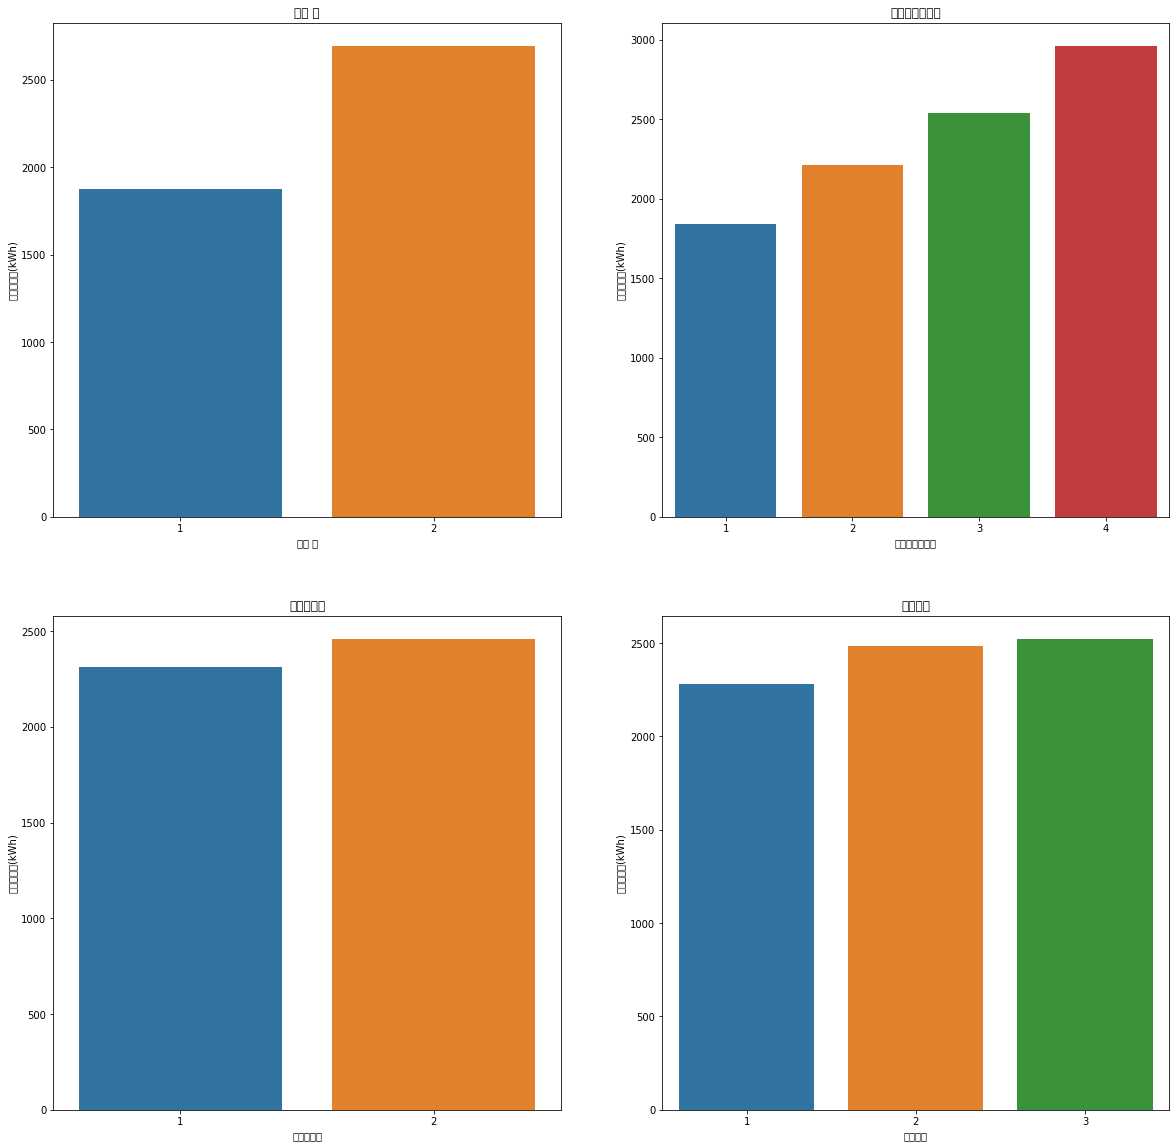

In [131]:
import seaborn as sns
khw1=df_train.groupby(['낮과 밤'])['전력사용량(kWh)'].mean().reset_index()
khw2=df_train.groupby(['불쾌지수위험도'])['전력사용량(kWh)'].mean().reset_index()
khw3=df_train.groupby(['열대야일수'])['전력사용량(kWh)'].mean().reset_index()
khw4=df_train.groupby(['폭염특보'])['전력사용량(kWh)'].mean().reset_index()


figure, ((ax1,ax2), (ax3,ax4)) =plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(20,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=khw1, x="낮과 밤", y="전력사용량(kWh)", ax=ax1)
'\n'
sns.barplot(data=khw2, x="불쾌지수위험도", y="전력사용량(kWh)", ax=ax2)
'\n'
sns.barplot(data=khw3, x="열대야일수", y="전력사용량(kWh)", ax=ax3)
'\n'
sns.barplot(data=khw4, x="폭염특보", y="전력사용량(kWh)", ax=ax4)

sns.set_style("darkgrid")
ax1.set(ylabel='전력사용량(kWh)', title ="낮과 밤")
ax2.set(ylabel='전력사용량(kWh)', title ="불쾌지수위험도")
ax3.set(ylabel='전력사용량(kWh)', title ="열대야일수")
ax4.set(ylabel='전력사용량(kWh)', title ="폭염특보")


도표설명

- 첫 번째 도표: 1: 밤, 2: 낮

- 두 번째 도표: 숫자가 커질수록 불쾌지수 up

- 세 번째 도표: 1: 열대야 해당X, 2: 열대야 해당O

- 네 번째 도표: 1: 일반, 2: 폭염주의보: 3: 폭염특보

[Text(0, 0.5, '전력사용량(kWh)'), Text(0.5, 1.0, '호우특보')]

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


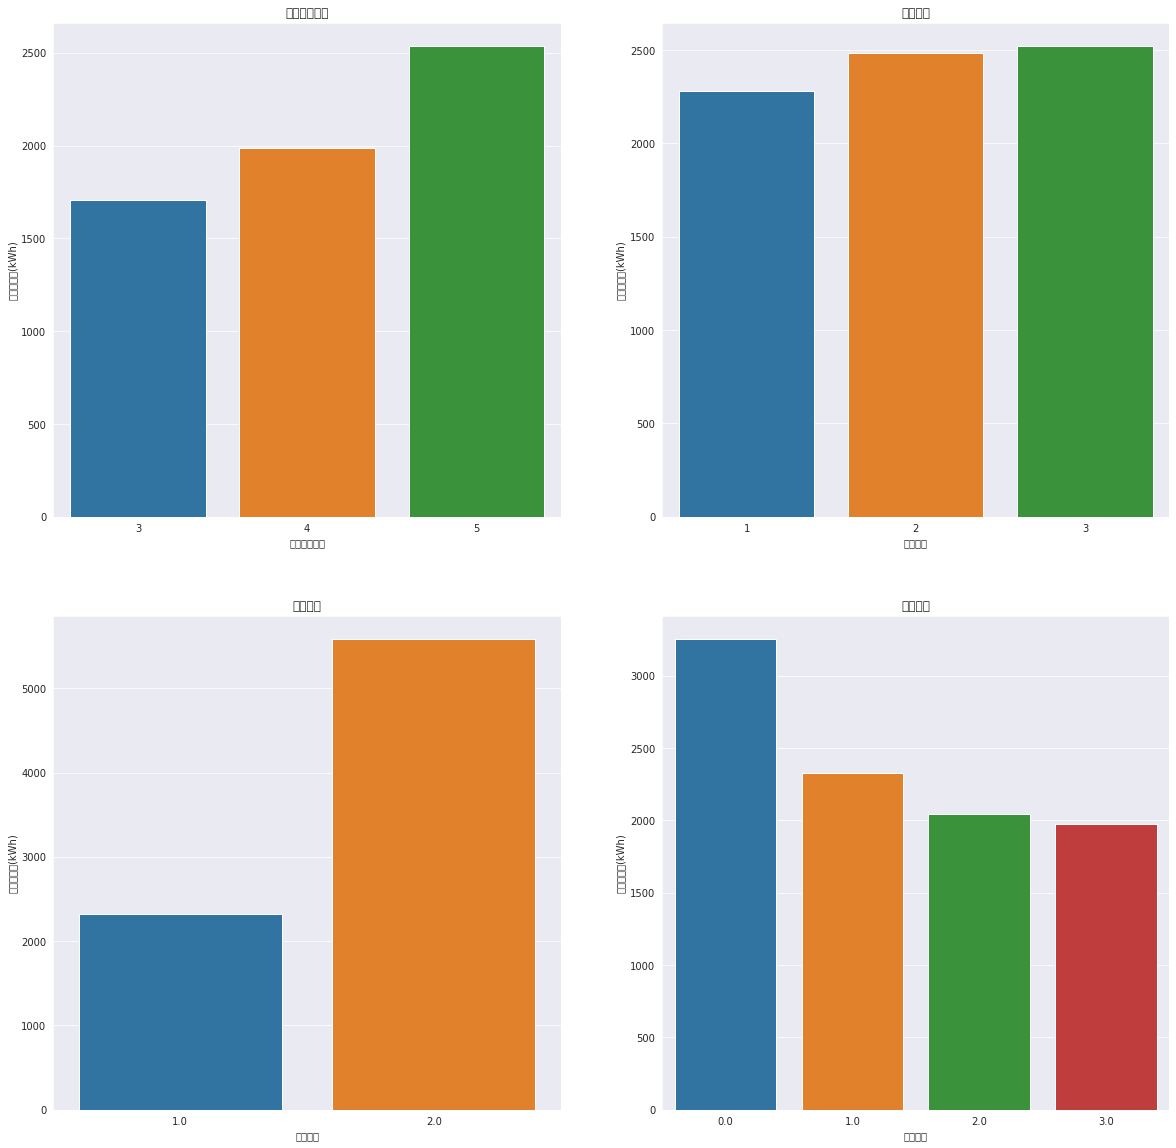

In [132]:
import seaborn as sns
khw1=df_train.groupby(['열지수위험도'])['전력사용량(kWh)'].mean().reset_index()
khw2=df_train.groupby(['폭염특보'])['전력사용량(kWh)'].mean().reset_index()
khw3=df_train.groupby(['강풍특보'])['전력사용량(kWh)'].mean().reset_index()
khw4=df_train.groupby(['호우특보'])['전력사용량(kWh)'].mean().reset_index()

plt.rcParams['font.family'] = 'NanumGothic'
figure, ((ax1,ax2), (ax3,ax4)) =plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(20,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=khw1, x="열지수위험도", y="전력사용량(kWh)", ax=ax1)
'\n'
sns.barplot(data=khw2, x="폭염특보", y="전력사용량(kWh)", ax=ax2)
'\n'
sns.barplot(data=khw3, x="강풍특보", y="전력사용량(kWh)", ax=ax3)
'\n'
sns.barplot(data=khw4, x="호우특보", y="전력사용량(kWh)", ax=ax4)

sns.set_style("darkgrid")
ax1.set(ylabel='전력사용량(kWh)', title ="열지수위험도")
ax2.set(ylabel='전력사용량(kWh)', title ="폭염특보")
ax3.set(ylabel='전력사용량(kWh)', title ="강풍특보")
ax4.set(ylabel='전력사용량(kWh)', title ="호우특보")


도표설명

- 첫 번째 도표: 열지수 위험도: 높을 수록 위험도 증가

- 두 번째 도표: 폭염특보: 0: 일반, 1: 폭염주의보, 2: 폭염경보

- 세 번째 도표: 강풍특보: 0: 일반, 1: 강풍주의보

- 네 번째 도표: 호우특보: 0: 일반, 1: 호우주의보

[Text(0, 0.5, '전력사용량(kWh)'), Text(0.5, 1.0, '체감온도')]

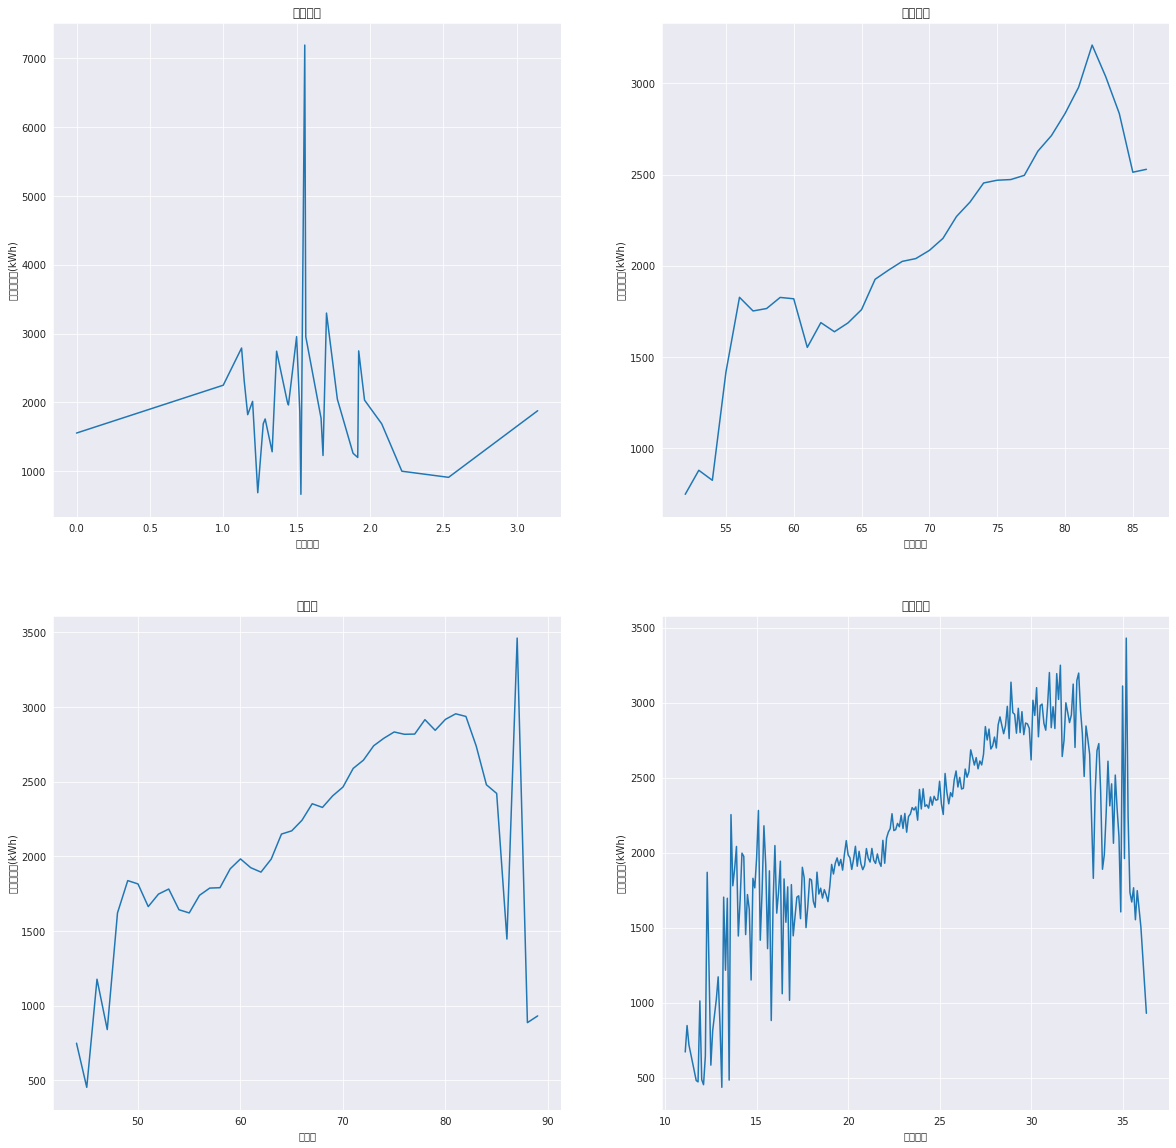

In [133]:
import seaborn as sns
khw1=df_train.groupby(['냉방도일'])['전력사용량(kWh)'].mean().reset_index()
khw2=df_train.groupby(['불쾌지수'])['전력사용량(kWh)'].mean().reset_index()
khw3=df_train.groupby(['열지수'])['전력사용량(kWh)'].mean().reset_index()
khw4=df_train.groupby(['체감온도'])['전력사용량(kWh)'].mean().reset_index()

plt.rcParams['font.family'] = 'NanumGothic'
figure, ((ax1,ax2), (ax3,ax4)) =plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(20,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.lineplot(data=khw1, x="냉방도일", y="전력사용량(kWh)", ax=ax1)
'\n'
sns.lineplot(data=khw2, x="불쾌지수", y="전력사용량(kWh)", ax=ax2)
'\n'
sns.lineplot(data=khw3, x="열지수", y="전력사용량(kWh)", ax=ax3)
'\n'
sns.lineplot(data=khw4, x="체감온도", y="전력사용량(kWh)", ax=ax4)

sns.set_style("darkgrid")
ax1.set(ylabel='전력사용량(kWh)', title ="냉방도일")
ax2.set(ylabel='전력사용량(kWh)', title ="불쾌지수")
ax3.set(ylabel='전력사용량(kWh)', title ="열지수")
ax4.set(ylabel='전력사용량(kWh)', title ="체감온도")


도표설명

- 첫 번째 도표: 냉방도일

- 두 번째 도표: 불쾌지수: 오른쪽으로 갈수록 불쾌지수 증가

- 세 번째 도표: 열지수: 오른쪽으로 갈수록 열지수 증가

- 네 번째 도표: 체감온도: 오른쪽으로 갈수록 체감온도 증가

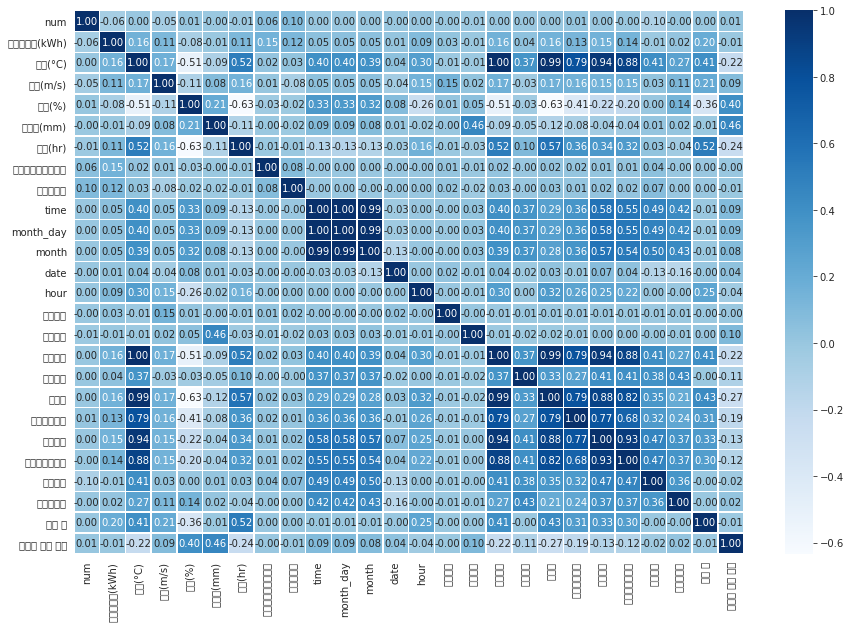

In [134]:
plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(data=df_train.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

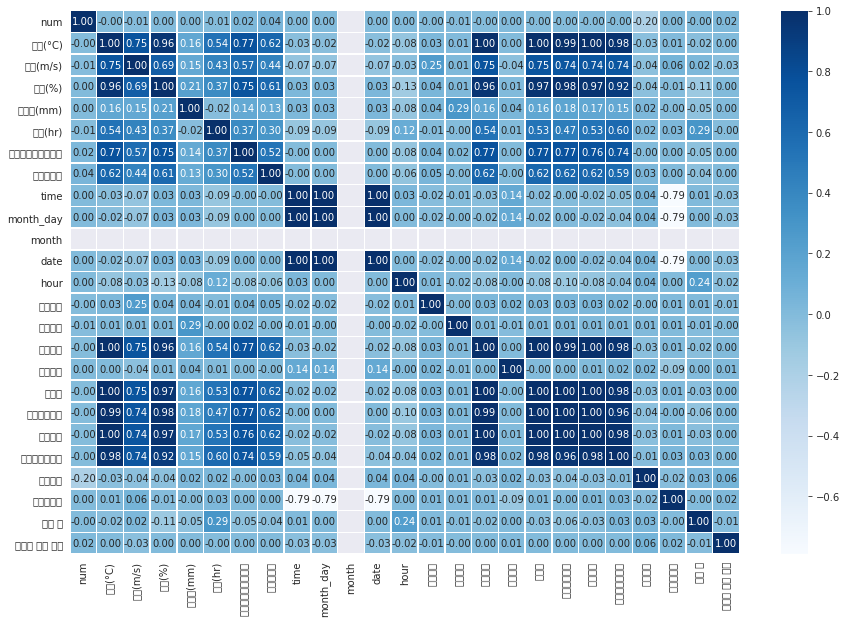

In [135]:
plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(data=df_test.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

Model 적용전 전처리1
--

In [136]:
cl_train=df_train.copy()
# cl_train=df_train.drop(['date_time','전력사용량(kWh)'], axis=1)

In [137]:
cl_test=df_test.copy()
#cl_test=df_test.drop(['date_time'], axis=1)

In [138]:
c1_tn = pd.get_dummies(cl_train['비전기냉방설비운영'], prefix='비전기냉방설비운영')
c2_tn = pd.get_dummies(cl_train['태양광보유'], prefix='태양광보유')
c3_tn = pd.get_dummies(cl_train['강풍특보'], prefix='강풍특보')
c4_tn = pd.get_dummies(cl_train['호우특보'], prefix='호우특보')
c5_tn = pd.get_dummies(cl_train['폭염특보'], prefix='폭염특보')
c6_tn = pd.get_dummies(cl_train['열지수위험도'], prefix='열지수위험도')
c7_tn = pd.get_dummies(cl_train['불쾌지수위험도'], prefix='불쾌지수위험도')
c8_tn = pd.get_dummies(cl_train['열대야일수'], prefix='열대야일수')
c9_tn = pd.get_dummies(cl_train['낮과 밤'], prefix='낮과 밤')
c10_tn = pd.get_dummies(cl_train['시간별 비의 유무'], prefix='시간별 비의 유무')

c1_te = pd.get_dummies(cl_test['비전기냉방설비운영'], prefix='비전기냉방설비운영')
c2_te = pd.get_dummies(cl_test['태양광보유'], prefix='태양광보유')
c3_te = pd.get_dummies(cl_test['강풍특보'], prefix='강풍특보')
c4_te = pd.get_dummies(cl_test['호우특보'], prefix='호우특보')
c5_te = pd.get_dummies(cl_test['폭염특보'], prefix='폭염특보')
c6_te = pd.get_dummies(cl_test['열지수위험도'], prefix='열지수위험도')
c7_te = pd.get_dummies(cl_test['불쾌지수위험도'], prefix='불쾌지수위험도')
c8_te = pd.get_dummies(cl_test['열대야일수'], prefix='열대야일수')
c9_te = pd.get_dummies(cl_test['낮과 밤'], prefix='낮과 밤')
c10_te = pd.get_dummies(cl_test['시간별 비의 유무'], prefix='시간별 비의 유무')

In [139]:
c_train=pd.concat([c1_tn, c2_tn, c3_tn, c4_tn, c5_tn, c6_tn, c7_tn, c8_tn, c9_tn, c10_tn], axis=1)

In [140]:
c_test=pd.concat([c1_te, c2_te, c3_te, c4_te, c5_te, c6_te, c7_te, c8_te, c9_te, c10_te], axis=1)

In [141]:
cl_train=pd.concat([cl_train, c_train], axis=1)

In [142]:
cl_test=pd.concat([cl_test, c_test], axis=1)

In [143]:
cl_train.drop(['비전기냉방설비운영','태양광보유','강풍특보','호우특보','폭염특보','열지수위험도','불쾌지수위험도','열대야일수','낮과 밤','시간별 비의 유무'], axis=1, inplace=True)

In [144]:
cl_test.drop(['비전기냉방설비운영','태양광보유','강풍특보','호우특보','폭염특보','열지수위험도','불쾌지수위험도','열대야일수','낮과 밤','시간별 비의 유무'], axis=1, inplace=True)

In [145]:
cl_train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),time,month_day,month,date,hour,day,체감온도,열지수,불쾌지수,냉방도일,비전기냉방설비운영_0.0,비전기냉방설비운영_1.0,태양광보유_0.0,태양광보유_1.0,강풍특보_1.0,강풍특보_2.0,호우특보_0.0,호우특보_1.0,호우특보_2.0,호우특보_3.0,폭염특보_1,폭염특보_2,폭염특보_3,열지수위험도_3,열지수위험도_4,열지수위험도_5,불쾌지수위험도_1,불쾌지수위험도_2,불쾌지수위험도_3,불쾌지수위험도_4,열대야일수_1,열대야일수_2,낮과 밤_1,낮과 밤_2,시간별 비의 유무_1,시간별 비의 유무_2
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,60100,601,6,1,0,Monday,17.6,56,63,1.363636,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,60101,601,6,1,1,Monday,17.7,56,63,1.363636,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,60102,601,6,1,2,Monday,17.5,56,63,1.363636,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,60103,601,6,1,3,Monday,17.1,55,62,1.363636,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,60104,601,6,1,4,Monday,17.0,55,62,1.363636,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,82419,824,8,24,19,Monday,27.8,74,77,1.000000,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,82420,824,8,24,20,Monday,27.3,73,77,1.000000,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,82421,824,8,24,21,Monday,27.3,73,77,1.000000,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,82422,824,8,24,22,Monday,27.1,72,77,1.000000,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0


In [146]:
cl_train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', 'time', 'month_day', 'month', 'date', 'hour',
       'day', '체감온도', '열지수', '불쾌지수', '냉방도일', '비전기냉방설비운영_0.0', '비전기냉방설비운영_1.0',
       '태양광보유_0.0', '태양광보유_1.0', '강풍특보_1.0', '강풍특보_2.0', '호우특보_0.0',
       '호우특보_1.0', '호우특보_2.0', '호우특보_3.0', '폭염특보_1', '폭염특보_2', '폭염특보_3',
       '열지수위험도_3', '열지수위험도_4', '열지수위험도_5', '불쾌지수위험도_1', '불쾌지수위험도_2',
       '불쾌지수위험도_3', '불쾌지수위험도_4', '열대야일수_1', '열대야일수_2', '낮과 밤_1', '낮과 밤_2',
       '시간별 비의 유무_1', '시간별 비의 유무_2'],
      dtype='object')

In [147]:
cl_test.columns

Index(['num', 'date_time', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)',
       'time', 'month_day', 'month', 'date', 'hour', 'day', '체감온도', '열지수',
       '불쾌지수', '냉방도일', '비전기냉방설비운영_0.0', '비전기냉방설비운영_1.0', '태양광보유_0.0',
       '태양광보유_1.0', '강풍특보_1.0', '강풍특보_2.0', '강풍특보_3.0', '호우특보_1.0', '호우특보_2.0',
       '폭염특보_1', '폭염특보_2', '열지수위험도_1', '열지수위험도_4', '열지수위험도_5', '불쾌지수위험도_1',
       '불쾌지수위험도_2', '불쾌지수위험도_3', '불쾌지수위험도_4', '열대야일수_1', '열대야일수_2', '낮과 밤_1',
       '낮과 밤_2', '시간별 비의 유무_1', '시간별 비의 유무_2'],
      dtype='object')

In [148]:
# cl_train에는 있지만 cl_test에는 없는 칼럼

cl_test['호우특보_3.0']=0
cl_test['폭염특보_3']=0
cl_test['열지수위험도_3']=0
cl_test['열지수위험도_2']=0
cl_test['호우특보_0.0']=0

In [149]:
# cl_test에는 있지만 cl_train에는 없는 칼럼
cl_train['강풍특보_3.0']=0
cl_train['열지수위험도_1']=0
cl_train['열지수위험도_2']=0

Train 칼럼과 Test 칼럼 맞춰주기

In [150]:
cl_train=cl_train[['num','date_time', '전력사용량(kWh)','time', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)',
       'month_day', 'month', 'date', 'hour', 'day', '체감온도', '열지수', '불쾌지수',
       '냉방도일', '비전기냉방설비운영_0.0', '비전기냉방설비운영_1.0', '태양광보유_0.0', '태양광보유_1.0',
       '강풍특보_1.0', '강풍특보_2.0','강풍특보_3.0', '호우특보_0.0', '호우특보_1.0', '호우특보_2.0', '호우특보_3.0',
       '폭염특보_1', '폭염특보_2', '폭염특보_3', '열지수위험도_1',  '열지수위험도_2','열지수위험도_3', '열지수위험도_4', '열지수위험도_5',
       '불쾌지수위험도_1', '불쾌지수위험도_2', '불쾌지수위험도_3', '불쾌지수위험도_4', '열대야일수_1',
       '열대야일수_2', '낮과 밤_1', '낮과 밤_2', '시간별 비의 유무_1', '시간별 비의 유무_2']]

In [151]:
cl_test=cl_test[['num','date_time','time', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)',
       'month_day', 'month', 'date', 'hour', 'day', '체감온도', '열지수', '불쾌지수',
       '냉방도일', '비전기냉방설비운영_0.0', '비전기냉방설비운영_1.0', '태양광보유_0.0', '태양광보유_1.0',
       '강풍특보_1.0', '강풍특보_2.0','강풍특보_3.0', '호우특보_0.0', '호우특보_1.0', '호우특보_2.0', '호우특보_3.0',
       '폭염특보_1', '폭염특보_2', '폭염특보_3', '열지수위험도_1',  '열지수위험도_2','열지수위험도_3', '열지수위험도_4', '열지수위험도_5',
       '불쾌지수위험도_1', '불쾌지수위험도_2', '불쾌지수위험도_3', '불쾌지수위험도_4', '열대야일수_1',
       '열대야일수_2', '낮과 밤_1', '낮과 밤_2', '시간별 비의 유무_1', '시간별 비의 유무_2']]

Model 적용전 전처리2
--

In [152]:
cl_train.head()

,num,date_time,전력사용량(kWh),time,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),month_day,month,date,hour,day,체감온도,열지수,불쾌지수,냉방도일,비전기냉방설비운영_0.0,비전기냉방설비운영_1.0,태양광보유_0.0,태양광보유_1.0,강풍특보_1.0,강풍특보_2.0,강풍특보_3.0,호우특보_0.0,호우특보_1.0,호우특보_2.0,호우특보_3.0,폭염특보_1,폭염특보_2,폭염특보_3,열지수위험도_1,열지수위험도_2,열지수위험도_3,열지수위험도_4,열지수위험도_5,불쾌지수위험도_1,불쾌지수위험도_2,불쾌지수위험도_3,불쾌지수위험도_4,열대야일수_1,열대야일수_2,낮과 밤_1,낮과 밤_2,시간별 비의 유무_1,시간별 비의 유무_2
0,1,2020-06-01 00:00:00,8179.056,60100,17.6,2.5,92.0,0.8,0.0,601,6,1,0,Monday,17.6,56,63,1.363636,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
1,1,2020-06-01 01:00:00,8135.640,60101,17.7,2.9,91.0,0.3,0.0,601,6,1,1,Monday,17.7,56,63,1.363636,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
2,1,2020-06-01 02:00:00,8107.128,60102,17.5,3.2,91.0,0.0,0.0,601,6,1,2,Monday,17.5,56,63,1.363636,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
3,1,2020-06-01 03:00:00,8048.808,60103,17.1,3.2,91.0,0.0,0.0,601,6,1,3,Monday,17.1,55,62,1.363636,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
4,1,2020-06-01 04:00:00,8043.624,60104,17.0,3.3,92.0,0.0,0.0,601,6,1,4,Monday,17.0,55,62,1.363636,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0


In [153]:
cl_test.head()

,num,date_time,time,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),month_day,month,date,hour,day,체감온도,열지수,불쾌지수,냉방도일,비전기냉방설비운영_0.0,비전기냉방설비운영_1.0,태양광보유_0.0,태양광보유_1.0,강풍특보_1.0,강풍특보_2.0,강풍특보_3.0,호우특보_0.0,호우특보_1.0,호우특보_2.0,호우특보_3.0,폭염특보_1,폭염특보_2,폭염특보_3,열지수위험도_1,열지수위험도_2,열지수위험도_3,열지수위험도_4,열지수위험도_5,불쾌지수위험도_1,불쾌지수위험도_2,불쾌지수위험도_3,불쾌지수위험도_4,열대야일수_1,열대야일수_2,낮과 밤_1,낮과 밤_2,시간별 비의 유무_1,시간별 비의 유무_2
0,1,2020-08-25 00:00:00,82500,27.8,1.5,74.0,0.0,0.0,825,8,25,0,Tuesday,27.8,73,78,1.5625,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1
1,1,2020-08-25 01:00:00,82501,0.0,0.0,0.0,0.0,0.0,825,8,25,1,Tuesday,0.0,16,46,1.5625,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1
2,1,2020-08-25 02:00:00,82502,0.0,0.0,0.0,0.0,0.0,825,8,25,2,Tuesday,0.0,16,46,1.5625,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0
3,1,2020-08-25 03:00:00,82503,27.3,1.1,78.0,0.0,0.0,825,8,25,3,Tuesday,27.3,72,78,1.5625,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0
4,1,2020-08-25 04:00:00,82504,0.0,0.0,0.0,0.0,0.0,825,8,25,4,Tuesday,0.0,16,46,1.5625,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0


day label encoding

In [154]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

cl_train_encoded_day=le.fit_transform(cl_train['day'])
np_day=cl_train_encoded_day.reshape(-1,1)
day_1=map(lambda x: x[0], np_day)
day=pd.Series(day_1)

cl_train['day']=day

In [155]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

cl_test_encoded_day=le.fit_transform(cl_test['day'])
np_day=cl_test_encoded_day.reshape(-1,1)
day_1=map(lambda x: x[0], np_day)
day=pd.Series(day_1)

cl_test['day']=day

Train, Test 넣기 전 전처리
--

In [156]:
cl_train=cl_train.drop(['date_time'], axis=1)
cl_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 46 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num            122400 non-null  int64  
 1   전력사용량(kWh)     122400 non-null  float64
 2   time           122400 non-null  int64  
 3   기온(°C)         122400 non-null  float64
 4   풍속(m/s)        122400 non-null  float64
 5   습도(%)          122400 non-null  float64
 6   강수량(mm)        122400 non-null  float64
 7   일조(hr)         122400 non-null  float64
 8   month_day      122400 non-null  int64  
 9   month          122400 non-null  int64  
 10  date           122400 non-null  int64  
 11  hour           122400 non-null  int64  
 12  day            122400 non-null  int64  
 13  체감온도           122400 non-null  float64
 14  열지수            122400 non-null  int64  
 15  불쾌지수           122400 non-null  int64  
 16  냉방도일           115210 non-null  float64
 17  비전기냉방설비운영_0.0  122400 non-nul

In [157]:
cl_test=cl_test.drop(['date_time'], axis=1)
cl_test

,num,time,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),month_day,month,date,hour,day,체감온도,열지수,불쾌지수,냉방도일,비전기냉방설비운영_0.0,비전기냉방설비운영_1.0,태양광보유_0.0,태양광보유_1.0,강풍특보_1.0,강풍특보_2.0,강풍특보_3.0,호우특보_0.0,호우특보_1.0,호우특보_2.0,호우특보_3.0,폭염특보_1,폭염특보_2,폭염특보_3,열지수위험도_1,열지수위험도_2,열지수위험도_3,열지수위험도_4,열지수위험도_5,불쾌지수위험도_1,불쾌지수위험도_2,불쾌지수위험도_3,불쾌지수위험도_4,열대야일수_1,열대야일수_2,낮과 밤_1,낮과 밤_2,시간별 비의 유무_1,시간별 비의 유무_2
0,1,82500,27.8,1.5,74.0,0.0,0.0,825,8,25,0,5,27.8,73,78,1.5625,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1
1,1,82501,0.0,0.0,0.0,0.0,0.0,825,8,25,1,5,0.0,16,46,1.5625,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1
2,1,82502,0.0,0.0,0.0,0.0,0.0,825,8,25,2,5,0.0,16,46,1.5625,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0
3,1,82503,27.3,1.1,78.0,0.0,0.0,825,8,25,3,5,27.3,72,78,1.5625,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0
4,1,82504,0.0,0.0,0.0,0.0,0.0,825,8,25,4,5,0.0,16,46,1.5625,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,83119,0.0,0.0,0.0,0.0,0.0,831,8,31,19,1,0.0,16,46,1.0000,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0
10076,60,83120,0.0,0.0,0.0,0.0,0.0,831,8,31,20,1,0.0,16,46,1.0000,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0
10077,60,83121,27.9,4.1,68.0,0.0,0.0,831,8,31,21,1,27.9,74,77,1.0000,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
10078,60,83122,0.0,0.0,0.0,0.0,0.0,831,8,31,22,1,0.0,16,46,1.0000,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0


Train 데이터를 Train 데이터와 Test 데이터로 나누어서 모델 적용
--

In [158]:
cl_train_tn=cl_train.loc[cl_train['month_day']<818]

In [159]:
cl_train_te=cl_train.loc[cl_train['month_day']>=818]

In [168]:
x_train=cl_train_tn.drop(['전력사용량(kWh)'], axis=1)
y_train=cl_train_tn[['전력사용량(kWh)']]
x_test=cl_train_te.drop(['전력사용량(kWh)'], axis=1)
y_test=cl_train_te[['전력사용량(kWh)']]

MinMaxScaler 적용
--

In [169]:
x_train

,num,time,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),month_day,month,date,hour,day,체감온도,열지수,불쾌지수,냉방도일,비전기냉방설비운영_0.0,비전기냉방설비운영_1.0,태양광보유_0.0,태양광보유_1.0,강풍특보_1.0,강풍특보_2.0,강풍특보_3.0,호우특보_0.0,호우특보_1.0,호우특보_2.0,호우특보_3.0,폭염특보_1,폭염특보_2,폭염특보_3,열지수위험도_1,열지수위험도_2,열지수위험도_3,열지수위험도_4,열지수위험도_5,불쾌지수위험도_1,불쾌지수위험도_2,불쾌지수위험도_3,불쾌지수위험도_4,열대야일수_1,열대야일수_2,낮과 밤_1,낮과 밤_2,시간별 비의 유무_1,시간별 비의 유무_2
0,1,60100,17.6,2.5,92.0,0.8,0.0,601,6,1,0,1,17.6,56,63,1.363636,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
1,1,60101,17.7,2.9,91.0,0.3,0.0,601,6,1,1,1,17.7,56,63,1.363636,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
2,1,60102,17.5,3.2,91.0,0.0,0.0,601,6,1,2,1,17.5,56,63,1.363636,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
3,1,60103,17.1,3.2,91.0,0.0,0.0,601,6,1,3,1,17.1,55,62,1.363636,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
4,1,60104,17.0,3.3,92.0,0.0,0.0,601,6,1,4,1,17.0,55,62,1.363636,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122227,60,81719,28.0,1.2,81.0,0.0,0.9,817,8,17,19,1,28.0,73,79,1.000000,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0
122228,60,81720,26.8,2.1,86.0,0.0,0.0,817,8,17,20,1,26.8,71,78,1.000000,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
122229,60,81721,26.0,2.1,92.0,0.0,0.0,817,8,17,21,1,26.0,69,77,1.000000,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
122230,60,81722,25.8,1.0,87.0,0.0,0.0,817,8,17,22,1,25.8,69,76,1.000000,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0


In [171]:
x_test

,num,time,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),month_day,month,date,hour,day,체감온도,열지수,불쾌지수,냉방도일,비전기냉방설비운영_0.0,비전기냉방설비운영_1.0,태양광보유_0.0,태양광보유_1.0,강풍특보_1.0,강풍특보_2.0,강풍특보_3.0,호우특보_0.0,호우특보_1.0,호우특보_2.0,호우특보_3.0,폭염특보_1,폭염특보_2,폭염특보_3,열지수위험도_1,열지수위험도_2,열지수위험도_3,열지수위험도_4,열지수위험도_5,불쾌지수위험도_1,불쾌지수위험도_2,불쾌지수위험도_3,불쾌지수위험도_4,열대야일수_1,열대야일수_2,낮과 밤_1,낮과 밤_2,시간별 비의 유무_1,시간별 비의 유무_2
1872,1,81800,26.2,0.9,84.0,0.0,0.0,818,8,18,0,5,26.2,70,77,1.5625,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
1873,1,81801,25.7,0.9,86.0,0.0,0.0,818,8,18,1,5,25.7,69,76,1.5625,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
1874,1,81802,25.4,0.6,88.0,0.0,0.0,818,8,18,2,5,25.4,69,76,1.5625,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
1875,1,81803,25.0,0.4,89.0,0.0,0.0,818,8,18,3,5,25.0,68,75,1.5625,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
1876,1,81804,24.8,0.6,90.0,0.0,0.0,818,8,18,4,5,24.8,68,75,1.5625,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,82419,27.8,2.3,68.0,0.0,0.7,824,8,24,19,1,27.8,74,77,1.0000,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0
122396,60,82420,27.3,1.2,71.0,0.0,0.0,824,8,24,20,1,27.3,73,77,1.0000,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
122397,60,82421,27.3,1.8,71.0,0.0,0.0,824,8,24,21,1,27.3,73,77,1.0000,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
122398,60,82422,27.1,1.8,74.0,0.0,0.0,824,8,24,22,1,27.1,72,77,1.0000,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0


In [172]:
y_train

,전력사용량(kWh)
0,8179.056
1,8135.640
2,8107.128
3,8048.808
4,8043.624
...,...
122227,4261.248
122228,4202.064
122229,4036.608
122230,3850.416


In [173]:
y_test

,전력사용량(kWh)
1872,8690.976
1873,8672.184
1874,8645.616
1875,8583.408
1876,8562.672
...,...
122395,4114.368
122396,3975.696
122397,3572.208
122398,3299.184


In [174]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train)
x_trains=scaler.transform(x_train)


scaler.fit(y_train)
y_trains=scaler.transform(y_train)

scaler.fit(x_test)
x_tests=scaler.transform(x_test)

scaler.fit(y_test)
y_tests=scaler.transform(y_test)

In [177]:
x_train=pd.DataFrame(x_trains, index=x_train.index, columns=x_train.columns)
x_test=pd.DataFrame(x_tests, index=x_test.index, columns=x_test.columns)
y_train=pd.DataFrame(y_trains, index=y_train.index, columns=y_train.columns)
y_test=pd.DataFrame(y_tests, index=y_test.index, columns=y_test.columns)

In [181]:
x_train=x_train.astype(float)
x_test=x_test.astype(float)

In [182]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(112320, 45)
(112320, 1)
(10080, 45)
(10080, 1)


In [183]:
#def make_dataset(data, label, window_size=168):
#    feature_list = []
#    label_list = []
#    for i in range(len(data) - window_size):
#        feature_list.append(np.array(data[i:i+window_size]))
#        label_list.append(np.array(label[i+window_size]))
#
#    return np.array(feature_list), np.array(label_list)

In [184]:
import numpy as np

In [185]:
#x_train, y_train = make_dataset(x_train, y_train, 168)

CNN 모델 적용해보기
--

In [187]:
import numpy as np
def smape(a, f):
    return 1/len(a)*np.sum(2*np.abs(f-a)/(np.abs(a)+np.abs(f))*100)

In [207]:
# 검증 데이터셋을 만듭니다.
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_trains, y_trains, 
                                                  test_size = 0.3, random_state = 777)

In [312]:
y_train=y_train.astype(float)
y_test=y_test.astype(float)

In [313]:
print(x_train.shape)
print(y_train.shape)
print(x_tests.shape)
print(y_tests.shape)
print(x_val.shape)
print(y_val.shape)

(78624, 45)
(78624, 1)
(10080, 45)
(10080, 1)
(33696, 45)
(33696, 1)


In [314]:
y_train

array([[0.06638033],
       [0.10494664],
       [0.08748664],
       ...,
       [0.12380666],
       [0.13908883],
       [0.07328717]])

In [1]:
from tensorflow.keras.utils import to_categorical
to_categorical(y_train)

NameError: ignored

In [304]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.losses import mse
import tensorflow as tf

# 모델 설정 # input_shape = (45,))
model=Sequential()

model.add(Dense(64, input_shape = (45,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [305]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 64)                2944      
_________________________________________________________________
dense_73 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_74 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 17        
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


In [307]:
history=model.fit(x_train,y_train, epochs=100, batch_size=10, validation_data=(x_val, y_val))

Epoch 1/100
7863/7863 [==============================] - 23s 3ms/step - loss: nan - accuracy: 5.0875e-05 - val_loss: nan - val_accuracy: 2.9677e-05
Epoch 2/100
7863/7863 [==============================] - 24s 3ms/step - loss: nan - accuracy: 5.0875e-05 - val_loss: nan - val_accuracy: 2.9677e-05
Epoch 3/100
7863/7863 [==============================] - 24s 3ms/step - loss: nan - accuracy: 5.0875e-05 - val_loss: nan - val_accuracy: 2.9677e-05
Epoch 4/100
7863/7863 [==============================] - 24s 3ms/step - loss: nan - accuracy: 5.0875e-05 - val_loss: nan - val_accuracy: 2.9677e-05
Epoch 5/100
7863/7863 [==============================] - 23s 3ms/step - loss: nan - accuracy: 5.0875e-05 - val_loss: nan - val_accuracy: 2.9677e-05
Epoch 6/100
5560/7863 [====================>.........] - ETA: 4s - loss: nan - accuracy: 7.1942e-05

KeyboardInterrupt: ignored

LSTM 적용전 전처리
--

In [ ]:
ltn8.columns

Index(['num', 'date_time', '전력사용량(kWh)', 'time', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', 'month_day', 'month', 'date', 'hour', 'day',
       '체감온도', '열지수', '불쾌지수', '냉방도일', '비전기냉방설비운영_0.0', '비전기냉방설비운영_1.0',
       '태양광보유_0.0', '태양광보유_1.0', '강풍특보_1.0', '강풍특보_2.0', '강풍특보_3.0',
       '호우특보_0.0', '호우특보_1.0', '호우특보_2.0', '호우특보_3.0', '폭염특보_1', '폭염특보_2',
       '폭염특보_3', '열지수위험도_1', '열지수위험도_2', '열지수위험도_3', '열지수위험도_4', '열지수위험도_5',
       '불쾌지수위험도_1', '불쾌지수위험도_2', '불쾌지수위험도_3', '불쾌지수위험도_4', '열대야일수_1',
       '열대야일수_2', '낮과 밤_1', '낮과 밤_2', '시간별 비의 유무_1', '시간별 비의 유무_2'],
      dtype='object')

In [ ]:
ltn8.drop(['num'], axis=1, inplace=True)
ltn8=ltn8.groupby(['date_time'])[ '전력사용량(kWh)', 'time', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', 'month_day', 'month', 'date', 'hour', 'day',
       '체감온도', '열지수', '불쾌지수', '냉방도일', '비전기냉방설비운영_0.0', '비전기냉방설비운영_1.0',
       '태양광보유_0.0', '태양광보유_1.0', '강풍특보_1.0', '강풍특보_2.0', '강풍특보_3.0',
       '호우특보_0.0', '호우특보_1.0', '호우특보_2.0', '호우특보_3.0', '폭염특보_1', '폭염특보_2',
       '폭염특보_3', '열지수위험도_1', '열지수위험도_2', '열지수위험도_3', '열지수위험도_4', '열지수위험도_5',
       '불쾌지수위험도_1', '불쾌지수위험도_2', '불쾌지수위험도_3', '불쾌지수위험도_4', '열대야일수_1',
       '열대야일수_2', '낮과 밤_1', '낮과 밤_2', '시간별 비의 유무_1', '시간별 비의 유무_2'].sum()

In [ ]:
ltn8.shape

(2040, 45)

모델 적용해보기
--

 window_size=168
 
  과거 168시간을 기반으로 168시간 뒤를 예측한다고 가정합니다.

이 떄, make_dataset이라는 함수를 만들어
feature_list&label list를 분리합니다.

TEST_SIZE=168 은 학습은 과거부터 168시간 이전의 데이터를 학습하게 되고, TEST를 위해서 이후 168시간의 데이터로 모델이 예측하도록 한 다음, 실제 데이터와 오차가 얼마나 있는지 확인해 보도록 하겠습니다.


- LSTM은 2차원 배열을 받지 못하기 때문에 3차원으로 만들어 줍니다.

- LSTM 3차원 배열

(data size, time_steps, features)

In [ ]:
import numpy as np
def smape(a, f):
    return 1/len(a)*np.sum(2*np.abs(f-a)/(np.abs(a)+np.abs(f))*100)

In [ ]:
train = ltn8[:-336]
test = ltn8[-336:]

In [ ]:
def make_dataset(data, label, window_size=168):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
from sklearn.model_selection import train_test_split

feature_cols = ['time', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)',
       'month_day', 'month', 'date', 'hour', 'day', '체감온도', '열지수', '불쾌지수',
       '냉방도일', '비전기냉방설비운영_0.0', '비전기냉방설비운영_1.0', '태양광보유_0.0', '태양광보유_1.0',
       '강풍특보_1.0', '강풍특보_2.0', '강풍특보_3.0', '호우특보_0.0', '호우특보_1.0', '호우특보_2.0',
       '호우특보_3.0', '폭염특보_1', '폭염특보_2', '폭염특보_3', '열지수위험도_1', '열지수위험도_2',
       '열지수위험도_3', '열지수위험도_4', '열지수위험도_5', '불쾌지수위험도_1', '불쾌지수위험도_2',
       '불쾌지수위험도_3', '불쾌지수위험도_4', '열대야일수_1', '열대야일수_2', '낮과 밤_1', '낮과 밤_2',
       '시간별 비의 유무_1', '시간별 비의 유무_2']
label_cols = ['전력사용량(kWh)']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 168)

x_train, x_val, y_train, y_val = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_val.shape

((1228, 168, 44), (308, 168, 44))

In [ ]:
test_feature=test[feature_cols]
test_label=test[label_cols]

In [ ]:
test_feature, test_label = make_dataset(test_feature, test_label,168)
test_feature.shape, test_label.shape

((168, 168, 44), (168, 1))

In [ ]:
x_test=test_feature
y_test=test_label

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1228, 168, 44)
(1228, 1)
(168, 168, 44)
(168, 1)


In [ ]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

LSTM
--

In [ ]:
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential([])
model.add(LSTM(20, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='tanh', 
               return_sequences=False))

model.add(Dense(6))        
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 20)                5200      
_________________________________________________________________
dense_44 (Dense)             (None, 6)                 126       
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 7         
Total params: 5,333
Trainable params: 5,333
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam')
        
early_stop = EarlyStopping(monitor='var_loss', patience=5)
        
model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                epochs=200, batch_size=100, validation_data=(x_val, y_val), callbacks=[early_stop, checkpoint])

Epoch 1/200
13/13 [==============================] - 3s 55ms/step - loss: 5.9309e-08 - val_loss: 5.9483e-08

Epoch 00001: val_loss improved from inf to 0.00000, saving model to model/tmp_checkpoint.h5
Epoch 2/200
13/13 [==============================] - 0s 13ms/step - loss: 5.9284e-08 - val_loss: 5.9483e-08

Epoch 00002: val_loss did not improve from 0.00000
Epoch 3/200
13/13 [==============================] - 0s 13ms/step - loss: 5.9104e-08 - val_loss: 5.9483e-08

Epoch 00003: val_loss did not improve from 0.00000
Epoch 4/200
13/13 [==============================] - 0s 12ms/step - loss: 5.8871e-08 - val_loss: 5.9483e-08

Epoch 00004: val_loss did not improve from 0.00000
Epoch 5/200
13/13 [==============================] - 0s 12ms/step - loss: 5.8456e-08 - val_loss: 5.9483e-08

Epoch 00005: val_loss did not improve from 0.00000
Epoch 6/200
13/13 [==============================] - 0s 13ms/step - loss: 5.9855e-08 - val_loss: 5.9483e-08

Epoch 00006: val_loss did not improve from 0.00000

In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
import sys

#model.load_weights(filename)

model = Sequential([])

model.add(LSTM(20, 
        input_shape=(test_feature.shape[1], test_feature.shape[2]), 
               activation='relu', 
               return_sequences=False))
        
model.add(Dense(6))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
        
early_stop = EarlyStopping(monitor='val_loss', patience=5)
        
model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [ ]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 20)                5200      
_________________________________________________________________
dense_46 (Dense)             (None, 6)                 126       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 7         
Total params: 5,333
Trainable params: 5,333
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred = model.predict(test_feature)

pred.shape

(168, 1)

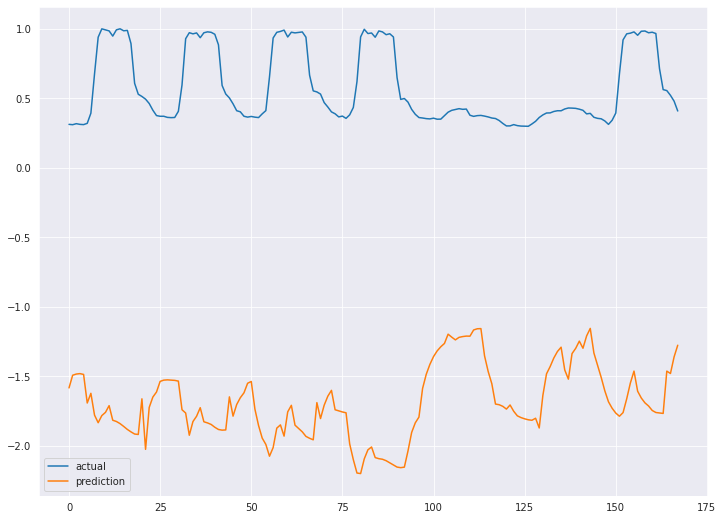

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

In [ ]:
score=smape(test_label, pred)

print('smape는', format(score), '입니다.')

smape는 200.0 입니다.


참고자료
--

In [ ]:
#def make_dataset(data, label, window_size=168):
#    feature_list = []
#    label_list = []
#    for i in range(len(data) - window_size):
#        feature_list.append(np.array(data.iloc[i:i+window_size]))
#        label_list.append(np.array(label.iloc[i+window_size]))
#    return np.array(feature_list), np.array(label_list)

In [ ]:
#from sklearn.model_selection import train_test_split
#
#feature_cols = ['time', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)',
#       'month_day', 'month', 'date', 'hour', 'day', '체감온도', '열지수', '불쾌지수',
#       '냉방도일', '비전기냉방설비운영_0.0', '비전기냉방설비운영_1.0', '태양광보유_0.0', '태양광보유_1.0',
#       '강풍특보_1.0', '강풍특보_2.0', '강풍특보_3.0', '호우특보_0.0', '호우특보_1.0', '호우특보_2.0',
#       '호우특보_3.0', '폭염특보_1', '폭염특보_2', '폭염특보_3', '열지수위험도_1', '열지수위험도_2',
#       '열지수위험도_3', '열지수위험도_4', '열지수위험도_5', '불쾌지수위험도_1', '불쾌지수위험도_2',
#       '불쾌지수위험도_3', '불쾌지수위험도_4', '열대야일수_1', '열대야일수_2', '낮과 밤_1', '낮과 밤_2',
#       '시간별 비의 유무_1', '시간별 비의 유무_2']
#label_cols = ['전력사용량(kWh)']
#
#train_feature = train[feature_cols]
#train_label = train[label_cols]
#
#train_feature, train_label = make_dataset(train_feature, train_label, 168)
#
#x_train, x_val, y_train, y_val = train_test_split(train_feature, train_label, test_size=0.2)
#x_train.shape, x_val.shape

In [ ]:
#test_feature=test[feature_cols]
#test_label=test[label_cols]

In [ ]:
#test_feature, test_label = make_dataset(test_feature, test_label,168)
#test_feature.shape, test_label.shape

In [ ]:
#x_test=test_feature
#y_test=test_label

In [ ]:
#import tensorflow as tf
#
#class myCallback(tf.keras.callbacks.Callback):
#  def on_epoch_end(self, epoch, logs={}):
#      if logs.get('loss') < 0.3:
#          print('\n훈련을 중지합니다.')
#          self.model.stop_training = True
#
#callbacks = myCallback()

In [ ]:
#import os
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.layers import LSTM
#
#class Model1:
#    def __init__(self, x_train, y_train, x_val, y_val):
#        self.x_train=x_train
#        self.y_train=y_train
#        self.x_val=x_val
#        self.y_val=y_val
#       
#    def lstm_model(x_train,y_train,x_val,y_val):
#        model = Sequential([])
#        model.add(LSTM(6, 
#               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
#               activation='relu', 
#               return_sequences=False))
#        
#        model.add(Dense(1))
#
#        return model
#
#    def lstm_summary(self):
#        a=Model1.lstm_model(x_train,y_train,x_val,y_val)
#        b=a.summary()
#
#        return b
#    
#    def lstm_fit(self,x_train,y_train,x_val,y_val):           
#        c=Model1.lstm_model(x_train,y_train,x_val,y_val)
#            
#        c.compile(loss='mean_squared_error', optimizer='adam')
#        early_stop = EarlyStopping(monitor='val_loss', patience=5)
#        
#        model_path = 'model'
#        filename = os.path.join(model_path, 'tmp_checkpoint.h5')
#        checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
#
#        history = c.fit(x_train, y_train, 
#                                    epochs=200, 
#                                    batch_size=16,
#                                    validation_data=(x_val, y_val),
#                                    callbacks=[early_stop, checkpoint])
#            
#        return history

In [ ]:
#pey=Model1(x_train,y_train,x_test,y_test)

In [ ]:
#pey.lstm_summary()

In [ ]:
#history=pey.lstm_fit(x_train,y_train,x_val,y_val)

In [ ]:
#history.history.keys()

In [ ]:
#학습결과 그려보기
#import matplotlib.pyplot as plt
#
#his_dict = history.history
#loss = his_dict['loss']
#val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.
#
#epochs = range(1,len(loss)+1 )
#fig = plt.figure(figsize= (10,5) )
#
# 학습 및 검증 손실 그리기
#
#ax1 = fig.add_subplot(1,2,1)
#ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
#ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
#ax1.set_title('train and val loss')
#ax1.set_xlabel('epochs')
#ax1.set_ylabel('loss')
#ax1.legend()
#
#
#plt.show()

In [ ]:
#import sys
#
#model.load_weights(filename)
#
#model = Sequential([])
#
#model.add(LSTM(6, 
#        input_shape=(train_feature.shape[1], train_feature.shape[2]), 
#               activation='relu', 
#               return_sequences=False))
#        
#model.add(Dense(1))
#
#model.compile(loss='mean_squared_error', optimizer='adam')
#        
#early_stop = EarlyStopping(monitor='val_loss', patience=5)
#        
#model_path = 'model'
#filename = os.path.join(model_path, 'tmp_checkpoint.h5')
#checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [ ]:
#model.summary()

In [ ]:
#pred = model.predict(test_feature)
#
#pred.shape

In [ ]:
#plt.figure(figsize=(12, 9))
#plt.plot(test_label, label = 'actual')
#plt.plot(pred, label = 'prediction')
#plt.legend()
#plt.show()

In [ ]:
#from sklearn.metrics import mean_squared_error
#
#y_test=ltn8['전력사용량(kWh)'][:]
#y_test =y_test[1872:2040]
#y_test=y_test.values
#pred=pd.DataFrame(pred)
#y_pred=pred[0].values
#
#rmse=(np.sqrt(mean_squared_error(y_test, y_pred)))
#score=smape(y_test, y_pred)
#
#print('smape는', format(score), '입니다.')
#print('rmse 는', format(rmse), '입니다.')